In [2]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Installing Packages/Libraries

import os #provides functions for interacting with the operating system
import requests
from alpha_vantage import *
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import seaborn as sn
from sklearn import svm, preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn import metrics 
import csv
import warnings
import datetime
import time
import requests
from pprint import pprint
warnings.filterwarnings('ignore')

In [4]:
# Specify API key and symbols for the currency pair
av_api_key = 'WID4GKWSRUGX4E5G'
ny_api_key = 'Xi8usKGqQ2KH6v4BOnld9dVzdYIOFLfy'
symbols = ['EURUSD']

In [5]:
eurusd = pd.read_csv('EURUSD_Data2.csv')
print(eurusd.shape)
print(eurusd.dtypes)
eurusd.head(5)

(6065, 5)
Date      object
Close    float64
Open     float64
High     float64
Low      float64
dtype: object


Date   Close    Open    High     Low
0  2023-03-31  1.0842  1.0905  1.0926  1.0837
1  2023-03-30  1.0901  1.0844  1.0927  1.0823
2  2023-03-29  1.0843  1.0844  1.0872  1.0817
3  2023-03-28  1.0843  1.0797  1.0849  1.0795
4  2023-03-27  1.0796  1.0767  1.0800  1.0745

In [9]:
# Changing datatypes of 'Date' to datetime
eurusd[['Date']] = eurusd[['Date']].astype('datetime64')

In [10]:
# Creating a Variable for Binary "Close" data

# Calculate the difference between current day's closing price and previous day's closing price
eurusd['Close_diff'] = eurusd['Close'].diff()

# Create a binary column based on the Close_diff values
eurusd['Close_binary'] = eurusd['Close_diff'].apply(lambda x: 1 if x > 0 else 0)

# Drop the Close_diff column
eurusd = eurusd.drop(columns=['Close_diff'])


print(eurusd.shape)
print(eurusd.dtypes)
eurusd.head(5)

(6065, 6)
Date            datetime64[ns]
Close                  float64
Open                   float64
High                   float64
Low                    float64
Close_binary             int64
dtype: object


Date   Close    Open    High     Low  Close_binary
0 2023-03-31  1.0842  1.0905  1.0926  1.0837             0
1 2023-03-30  1.0901  1.0844  1.0927  1.0823             1
2 2023-03-29  1.0843  1.0844  1.0872  1.0817             0
3 2023-03-28  1.0843  1.0797  1.0849  1.0795             0
4 2023-03-27  1.0796  1.0767  1.0800  1.0745             0

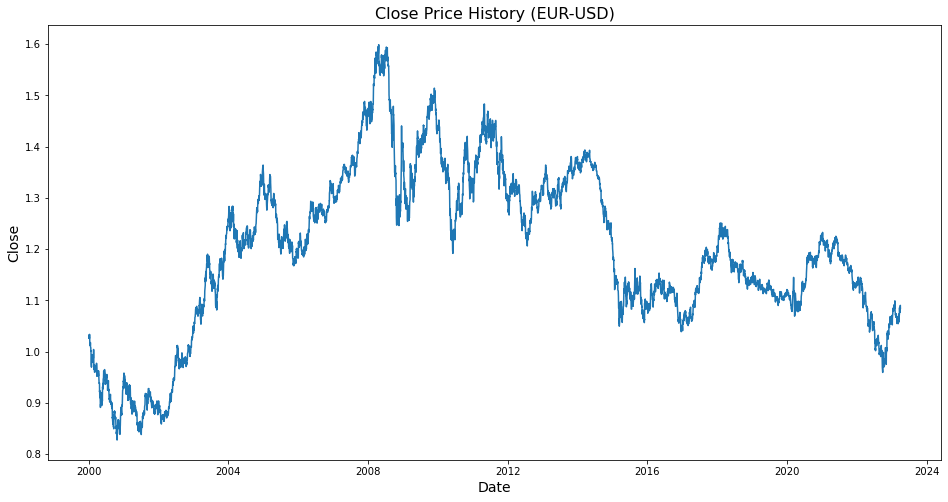

In [11]:
dates = [pd.Timestamp(date) for date in eurusd['Date']]
close = np.array(eurusd['Close'],dtype='float')
plt.figure(figsize=(16,8))
plt.title('Close Price History (EUR-USD)', fontsize = 16)
plt.plot(dates,close)
plt.ylabel('Close', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.show()

In [40]:
eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6065 non-null   datetime64[ns]
 1   Close         6065 non-null   float64       
 2   Open          6065 non-null   float64       
 3   High          6065 non-null   float64       
 4   Low           6065 non-null   float64       
 5   Close_binary  6065 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 284.4 KB


In [41]:
eurusd.describe()

Close         Open         High          Low  Close_binary
count  6065.000000  6065.000000  6065.000000  6065.000000   6065.000000
mean      1.197337     1.197296     1.202686     1.191914      0.490354
std       0.159417     0.159424     0.159992     0.158780      0.499948
min       0.827300     0.826800     0.832600     0.822700      0.000000
25%       1.100900     1.100800     1.105200     1.096300      0.000000
50%       1.195300     1.194900     1.199700     1.190900      0.000000
75%       1.315500     1.315600     1.321500     1.309500      1.000000
max       1.598800     1.600000     1.603900     1.586500      1.000000

In [69]:
# Requires the latest pip
!pip install tensorflow

In [70]:
# Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [71]:
# Requires the latest pip
!pip install keras

In [42]:
### Technical Analysis

In [43]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key=av_api_key)

# Real-time data
data, _ = cc.get_currency_exchange_rate(from_currency='EUR',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'EUR',
 '2. From_Currency Name': 'Euro',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '1.09902190',
 '6. Last Refreshed': '2023-04-17 05:20:00',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '1.09898184',
 '9. Ask Price': '1.09907283'}


In [44]:
ts = TimeSeries(key='WID4GKWSRUGX4E5G', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='EURUSD',interval='1min', outputsize='full')
pprint(data.head())

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2023-04-17 01:19:00   1.0986   1.0987  1.0985    1.0986        0.0
2023-04-17 01:18:00   1.0986   1.0987  1.0985    1.0986        0.0
2023-04-17 01:17:00   1.0986   1.0987  1.0985    1.0986        0.0
2023-04-17 01:16:00   1.0986   1.0986  1.0984    1.0986        0.0
2023-04-17 01:15:00   1.0985   1.0986  1.0984    1.0985        0.0


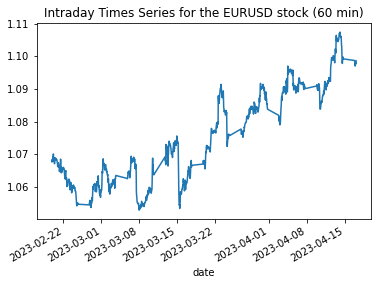

In [45]:
ts = TimeSeries(av_api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='EURUSD',interval='60min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the EURUSD stock (60 min)')
plt.show()

In [46]:
## SMA EUR/USD
url = 'https://www.alphavantage.co/query?function=SMA&symbol=EURUSD&interval=daily&time_period=10&series_type=open&apikey={av_api_key}'
r = requests.get(url)
SMA = r.json()

pprint(SMA)



{'Meta Data': {'1: Symbol': 'EURUSD',
               '2: Indicator': 'Simple Moving Average (SMA)',
               '3: Last Refreshed': '2023-04-17 05:20:00',
               '4: Interval': 'daily',
               '5: Time Period': 10,
               '6: Series Type': 'open',
               '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2004-03-01': {'SMA': '1.2622'},
                             '2004-03-02': {'SMA': '1.2583'},
                             '2004-03-03': {'SMA': '1.2522'},
                             '2004-03-04': {'SMA': '1.2471'},
                             '2004-03-05': {'SMA': '1.2420'},
                             '2004-03-08': {'SMA': '1.2406'},
                             '2004-03-09': {'SMA': '1.2391'},
                             '2004-03-10': {'SMA': '1.2357'},
                             '2004-03-11': {'SMA': '1.2331'},
                             '2004-03-12': {'SMA': '1.2320'},
                             '2004-03-15': {'SMA': '1.2298

                             '2006-08-29': {'SMA': '1.2811'},
                             '2006-08-30': {'SMA': '1.2815'},
                             '2006-08-31': {'SMA': '1.2815'},
                             '2006-09-01': {'SMA': '1.2813'},
                             '2006-09-04': {'SMA': '1.2809'},
                             '2006-09-05': {'SMA': '1.2807'},
                             '2006-09-06': {'SMA': '1.2808'},
                             '2006-09-07': {'SMA': '1.2810'},
                             '2006-09-08': {'SMA': '1.2807'},
                             '2006-09-11': {'SMA': '1.2797'},
                             '2006-09-12': {'SMA': '1.2789'},
                             '2006-09-13': {'SMA': '1.2774'},
                             '2006-09-14': {'SMA': '1.2761'},
                             '2006-09-15': {'SMA': '1.2753'},
                             '2006-09-18': {'SMA': '1.2733'},
                             '2006-09-19': {'SMA': '1.2717'},
        

                             '2008-02-18': {'SMA': '1.4609'},
                             '2008-02-19': {'SMA': '1.4591'},
                             '2008-02-20': {'SMA': '1.4599'},
                             '2008-02-21': {'SMA': '1.4607'},
                             '2008-02-22': {'SMA': '1.4640'},
                             '2008-02-25': {'SMA': '1.4672'},
                             '2008-02-26': {'SMA': '1.4703'},
                             '2008-02-27': {'SMA': '1.4742'},
                             '2008-02-28': {'SMA': '1.4798'},
                             '2008-02-29': {'SMA': '1.4853'},
                             '2008-03-03': {'SMA': '1.4905'},
                             '2008-03-04': {'SMA': '1.4959'},
                             '2008-03-05': {'SMA': '1.5008'},
                             '2008-03-06': {'SMA': '1.5063'},
                             '2008-03-07': {'SMA': '1.5120'},
                             '2008-03-10': {'SMA': '1.5172'},
        

                             '2010-01-18': {'SMA': '1.4428'},
                             '2010-01-19': {'SMA': '1.4425'},
                             '2010-01-20': {'SMA': '1.4418'},
                             '2010-01-21': {'SMA': '1.4387'},
                             '2010-01-22': {'SMA': '1.4365'},
                             '2010-01-25': {'SMA': '1.4338'},
                             '2010-01-26': {'SMA': '1.4301'},
                             '2010-01-27': {'SMA': '1.4260'},
                             '2010-01-28': {'SMA': '1.4211'},
                             '2010-01-29': {'SMA': '1.4158'},
                             '2010-02-01': {'SMA': '1.4106'},
                             '2010-02-02': {'SMA': '1.4061'},
                             '2010-02-03': {'SMA': '1.4029'},
                             '2010-02-04': {'SMA': '1.4007'},
                             '2010-02-05': {'SMA': '1.3972'},
                             '2010-02-08': {'SMA': '1.3926'},
        

                             '2012-12-03': {'SMA': '1.2912'},
                             '2012-12-04': {'SMA': '1.2937'},
                             '2012-12-05': {'SMA': '1.2964'},
                             '2012-12-06': {'SMA': '1.2988'},
                             '2012-12-07': {'SMA': '1.2997'},
                             '2012-12-10': {'SMA': '1.2989'},
                             '2012-12-11': {'SMA': '1.2986'},
                             '2012-12-12': {'SMA': '1.2992'},
                             '2012-12-13': {'SMA': '1.3004'},
                             '2012-12-14': {'SMA': '1.3014'},
                             '2012-12-17': {'SMA': '1.3032'},
                             '2012-12-18': {'SMA': '1.3043'},
                             '2012-12-19': {'SMA': '1.3057'},
                             '2012-12-20': {'SMA': '1.3073'},
                             '2012-12-21': {'SMA': '1.3100'},
                             '2012-12-24': {'SMA': '1.3129'},
        

                             '2015-09-01': {'SMA': '1.1288'},
                             '2015-09-02': {'SMA': '1.1316'},
                             '2015-09-03': {'SMA': '1.1326'},
                             '2015-09-04': {'SMA': '1.1315'},
                             '2015-09-07': {'SMA': '1.1290'},
                             '2015-09-08': {'SMA': '1.1248'},
                             '2015-09-09': {'SMA': '1.1216'},
                             '2015-09-10': {'SMA': '1.1204'},
                             '2015-09-11': {'SMA': '1.1208'},
                             '2015-09-14': {'SMA': '1.1223'},
                             '2015-09-15': {'SMA': '1.1232'},
                             '2015-09-16': {'SMA': '1.1229'},
                             '2015-09-17': {'SMA': '1.1237'},
                             '2015-09-18': {'SMA': '1.1266'},
                             '2015-09-21': {'SMA': '1.1281'},
                             '2015-09-22': {'SMA': '1.1282'},
        

                             '2017-09-15': {'SMA': '1.1940'},
                             '2017-09-18': {'SMA': '1.1947'},
                             '2017-09-19': {'SMA': '1.1953'},
                             '2017-09-20': {'SMA': '1.1960'},
                             '2017-09-21': {'SMA': '1.1956'},
                             '2017-09-22': {'SMA': '1.1949'},
                             '2017-09-25': {'SMA': '1.1939'},
                             '2017-09-26': {'SMA': '1.1928'},
                             '2017-09-27': {'SMA': '1.1910'},
                             '2017-09-28': {'SMA': '1.1895'},
                             '2017-09-29': {'SMA': '1.1881'},
                             '2017-10-02': {'SMA': '1.1868'},
                             '2017-10-03': {'SMA': '1.1846'},
                             '2017-10-04': {'SMA': '1.1821'},
                             '2017-10-05': {'SMA': '1.1808'},
                             '2017-10-06': {'SMA': '1.1785'},
        

                             '2020-06-29': {'SMA': '1.1250'},
                             '2020-06-30': {'SMA': '1.1242'},
                             '2020-07-01': {'SMA': '1.1239'},
                             '2020-07-02': {'SMA': '1.1240'},
                             '2020-07-03': {'SMA': '1.1243'},
                             '2020-07-06': {'SMA': '1.1250'},
                             '2020-07-07': {'SMA': '1.1254'},
                             '2020-07-08': {'SMA': '1.1250'},
                             '2020-07-09': {'SMA': '1.1258'},
                             '2020-07-10': {'SMA': '1.1265'},
                             '2020-07-13': {'SMA': '1.1274'},
                             '2020-07-14': {'SMA': '1.1284'},
                             '2020-07-15': {'SMA': '1.1301'},
                             '2020-07-16': {'SMA': '1.1317'},
                             '2020-07-17': {'SMA': '1.1331'},
                             '2020-07-20': {'SMA': '1.1351'},
        

                             '2022-07-01': {'SMA': '1.0519'},
                             '2022-07-04': {'SMA': '1.0513'},
                             '2022-07-05': {'SMA': '1.0504'},
                             '2022-07-06': {'SMA': '1.0477'},
                             '2022-07-07': {'SMA': '1.0439'},
                             '2022-07-08': {'SMA': '1.0403'},
                             '2022-07-11': {'SMA': '1.0365'},
                             '2022-07-12': {'SMA': '1.0311'},
                             '2022-07-13': {'SMA': '1.0262'},
                             '2022-07-14': {'SMA': '1.0224'},
                             '2022-07-15': {'SMA': '1.0178'},
                             '2022-07-18': {'SMA': '1.0144'},
                             '2022-07-19': {'SMA': '1.0117'},
                             '2022-07-20': {'SMA': '1.0113'},
                             '2022-07-21': {'SMA': '1.0112'},
                             '2022-07-22': {'SMA': '1.0119'},
        

In [47]:
import csv
# Convert JSON to DataFrame
SMA = pd.DataFrame(SMA)
SMA_eurusd = SMA.iloc[8:]
SMA_eurusd = SMA_eurusd.drop('Meta Data', axis=1)
SMA_eurusd.head()

Technical Analysis: SMA
2023-04-14       {'SMA': '1.0923'}
2023-04-13       {'SMA': '1.0909'}
2023-04-12       {'SMA': '1.0893'}
2023-04-11       {'SMA': '1.0886'}
2023-04-10       {'SMA': '1.0880'}

In [48]:
# Reset the index, which moves the index back to a column in the DataFrame
SMA_eurusd.reset_index(inplace=True)

# Rename the column containing the datetime index to 'Date'
SMA_eurusd.rename(columns={'index': 'Date'}, inplace=True)

# Separate the SMA values and Concat within Dataframe
SMA_eurusd2 = pd.concat([SMA_eurusd[['Date',f'Technical Analysis: SMA']],pd.json_normalize(SMA_eurusd[f'Technical Analysis: SMA']) ],axis=1)

# Quick overlook on the uploaded dataset
SMA_eurusd2.head()

Date Technical Analysis: SMA     SMA
0  2023-04-14       {'SMA': '1.0923'}  1.0923
1  2023-04-13       {'SMA': '1.0909'}  1.0909
2  2023-04-12       {'SMA': '1.0893'}  1.0893
3  2023-04-11       {'SMA': '1.0886'}  1.0886
4  2023-04-10       {'SMA': '1.0880'}  1.0880

In [49]:
# Create new dataframe for the columns 'Date' and 'SMA' Values
SMA_eurusd3 = SMA_eurusd2[['Date','SMA']]

# Convert 'Date' column to datetime index
SMA_eurusd3['Date'] = pd.to_datetime(SMA_eurusd3['Date'])
SMA_eurusd3.set_index('Date', inplace=True)

# Convert the 'SMA_Value' column to float
SMA_eurusd3['SMA'] = SMA_eurusd3['SMA'].astype(float)

# Verify the result
SMA_eurusd3.head()

SMA
Date              
2023-04-14  1.0923
2023-04-13  1.0909
2023-04-12  1.0893
2023-04-11  1.0886
2023-04-10  1.0880

In [100]:
# Present the SMA Values as Statistical data
sma_stats = SMA_eurusd3['SMA'].describe()
print(sma_stats)

count    4990.000000
mean        1.243252
std         0.126598
min         0.976000
25%         1.131425
50%         1.231150
75%         1.334100
max         1.585500
Name: SMA, dtype: float64


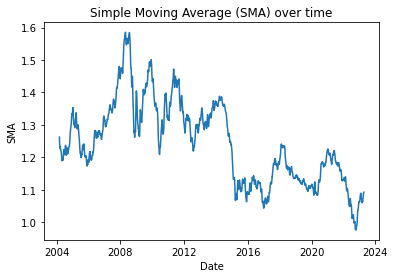

In [50]:
import matplotlib.pyplot as plt

# Plot the SMA Values against Date
plt.plot(SMA_eurusd3.index, SMA_eurusd3['SMA'])
plt.xlabel('Date')
plt.ylabel('SMA')
plt.title('Simple Moving Average (SMA) over time')
plt.show()

In [51]:
## EMA EUR/USD
url = 'https://www.alphavantage.co/query?function=EMA&symbol=EURUSD&interval=daily&time_period=10&series_type=open&apikey={av_api_key}'
r = requests.get(url)
EMA = r.json()

pprint(EMA)



{'Meta Data': {'1: Symbol': 'EURUSD',
               '2: Indicator': 'Exponential Moving Average (EMA)',
               '3: Last Refreshed': '2023-04-17 05:25:00',
               '4: Interval': 'daily',
               '5: Time Period': 10,
               '6: Series Type': 'open',
               '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: EMA': {'2004-03-01': {'EMA': '1.2622'},
                             '2004-03-02': {'EMA': '1.2590'},
                             '2004-03-03': {'EMA': '1.2523'},
                             '2004-03-04': {'EMA': '1.2463'},
                             '2004-03-05': {'EMA': '1.2414'},
                             '2004-03-08': {'EMA': '1.2408'},
                             '2004-03-09': {'EMA': '1.2404'},
                             '2004-03-10': {'EMA': '1.2393'},
                             '2004-03-11': {'EMA': '1.2364'},
                             '2004-03-12': {'EMA': '1.2355'},
                             '2004-03-15': {'EMA': '1

                             '2004-10-21': {'EMA': '1.2443'},
                             '2004-10-22': {'EMA': '1.2475'},
                             '2004-10-25': {'EMA': '1.2511'},
                             '2004-10-26': {'EMA': '1.2564'},
                             '2004-10-27': {'EMA': '1.2599'},
                             '2004-10-28': {'EMA': '1.2618'},
                             '2004-10-29': {'EMA': '1.2640'},
                             '2004-11-01': {'EMA': '1.2658'},
                             '2004-11-02': {'EMA': '1.2673'},
                             '2004-11-03': {'EMA': '1.2699'},
                             '2004-11-04': {'EMA': '1.2727'},
                             '2004-11-05': {'EMA': '1.2751'},
                             '2004-11-08': {'EMA': '1.2780'},
                             '2004-11-09': {'EMA': '1.2801'},
                             '2004-11-10': {'EMA': '1.2819'},
                             '2004-11-11': {'EMA': '1.2831'},
        

                             '2006-05-30': {'EMA': '1.2773'},
                             '2006-05-31': {'EMA': '1.2791'},
                             '2006-06-01': {'EMA': '1.2796'},
                             '2006-06-02': {'EMA': '1.2799'},
                             '2006-06-05': {'EMA': '1.2822'},
                             '2006-06-06': {'EMA': '1.2836'},
                             '2006-06-07': {'EMA': '1.2834'},
                             '2006-06-08': {'EMA': '1.2828'},
                             '2006-06-09': {'EMA': '1.2796'},
                             '2006-06-12': {'EMA': '1.2763'},
                             '2006-06-13': {'EMA': '1.2730'},
                             '2006-06-14': {'EMA': '1.2696'},
                             '2006-06-15': {'EMA': '1.2679'},
                             '2006-06-16': {'EMA': '1.2670'},
                             '2006-06-19': {'EMA': '1.2666'},
                             '2006-06-20': {'EMA': '1.2649'},
        

                             '2008-01-18': {'EMA': '1.4713'},
                             '2008-01-21': {'EMA': '1.4693'},
                             '2008-01-22': {'EMA': '1.4649'},
                             '2008-01-23': {'EMA': '1.4645'},
                             '2008-01-24': {'EMA': '1.4642'},
                             '2008-01-25': {'EMA': '1.4662'},
                             '2008-01-28': {'EMA': '1.4664'},
                             '2008-01-29': {'EMA': '1.4685'},
                             '2008-01-30': {'EMA': '1.4701'},
                             '2008-01-31': {'EMA': '1.4730'},
                             '2008-02-01': {'EMA': '1.4754'},
                             '2008-02-04': {'EMA': '1.4762'},
                             '2008-02-05': {'EMA': '1.4774'},
                             '2008-02-06': {'EMA': '1.4751'},
                             '2008-02-07': {'EMA': '1.4730'},
                             '2008-02-08': {'EMA': '1.4685'},
        

                             '2009-12-17': {'EMA': '1.4698'},
                             '2009-12-18': {'EMA': '1.4632'},
                             '2009-12-21': {'EMA': '1.4579'},
                             '2009-12-22': {'EMA': '1.4523'},
                             '2009-12-23': {'EMA': '1.4473'},
                             '2009-12-24': {'EMA': '1.4449'},
                             '2009-12-25': {'EMA': '1.4436'},
                             '2009-12-28': {'EMA': '1.4425'},
                             '2009-12-29': {'EMA': '1.4417'},
                             '2009-12-30': {'EMA': '1.4405'},
                             '2009-12-31': {'EMA': '1.4392'},
                             '2010-01-01': {'EMA': '1.4380'},
                             '2010-01-04': {'EMA': '1.4369'},
                             '2010-01-05': {'EMA': '1.4377'},
                             '2010-01-06': {'EMA': '1.4375'},
                             '2010-01-07': {'EMA': '1.4381'},
        

                             '2011-11-17': {'EMA': '1.3654'},
                             '2011-11-18': {'EMA': '1.3618'},
                             '2011-11-21': {'EMA': '1.3598'},
                             '2011-11-22': {'EMA': '1.3578'},
                             '2011-11-23': {'EMA': '1.3564'},
                             '2011-11-24': {'EMA': '1.3524'},
                             '2011-11-25': {'EMA': '1.3491'},
                             '2011-11-28': {'EMA': '1.3460'},
                             '2011-11-29': {'EMA': '1.3434'},
                             '2011-11-30': {'EMA': '1.3413'},
                             '2011-12-01': {'EMA': '1.3420'},
                             '2011-12-02': {'EMA': '1.3427'},
                             '2011-12-05': {'EMA': '1.3426'},
                             '2011-12-06': {'EMA': '1.3421'},
                             '2011-12-07': {'EMA': '1.3418'},
                             '2011-12-08': {'EMA': '1.3416'},
        

                             '2013-10-17': {'EMA': '1.3539'},
                             '2013-10-18': {'EMA': '1.3563'},
                             '2013-10-21': {'EMA': '1.3584'},
                             '2013-10-22': {'EMA': '1.3601'},
                             '2013-10-23': {'EMA': '1.3633'},
                             '2013-10-24': {'EMA': '1.3659'},
                             '2013-10-25': {'EMA': '1.3684'},
                             '2013-10-28': {'EMA': '1.3706'},
                             '2013-10-29': {'EMA': '1.3720'},
                             '2013-10-30': {'EMA': '1.3725'},
                             '2013-10-31': {'EMA': '1.3726'},
                             '2013-11-01': {'EMA': '1.3701'},
                             '2013-11-04': {'EMA': '1.3662'},
                             '2013-11-05': {'EMA': '1.3635'},
                             '2013-11-06': {'EMA': '1.3605'},
                             '2013-11-07': {'EMA': '1.3589'},
        

                             '2015-09-17': {'EMA': '1.1266'},
                             '2015-09-18': {'EMA': '1.1293'},
                             '2015-09-21': {'EMA': '1.1293'},
                             '2015-09-22': {'EMA': '1.1274'},
                             '2015-09-23': {'EMA': '1.1248'},
                             '2015-09-24': {'EMA': '1.1237'},
                             '2015-09-25': {'EMA': '1.1226'},
                             '2015-09-28': {'EMA': '1.1219'},
                             '2015-09-29': {'EMA': '1.1222'},
                             '2015-09-30': {'EMA': '1.1228'},
                             '2015-10-01': {'EMA': '1.1218'},
                             '2015-10-02': {'EMA': '1.1213'},
                             '2015-10-05': {'EMA': '1.1213'},
                             '2015-10-06': {'EMA': '1.1209'},
                             '2015-10-07': {'EMA': '1.1220'},
                             '2015-10-08': {'EMA': '1.1223'},
        

                             '2017-08-01': {'EMA': '1.1672'},
                             '2017-08-02': {'EMA': '1.1696'},
                             '2017-08-03': {'EMA': '1.1724'},
                             '2017-08-04': {'EMA': '1.1752'},
                             '2017-08-07': {'EMA': '1.1758'},
                             '2017-08-08': {'EMA': '1.1764'},
                             '2017-08-09': {'EMA': '1.1763'},
                             '2017-08-10': {'EMA': '1.1763'},
                             '2017-08-11': {'EMA': '1.1764'},
                             '2017-08-14': {'EMA': '1.1774'},
                             '2017-08-15': {'EMA': '1.1775'},
                             '2017-08-16': {'EMA': '1.1768'},
                             '2017-08-17': {'EMA': '1.1770'},
                             '2017-08-18': {'EMA': '1.1762'},
                             '2017-08-21': {'EMA': '1.1760'},
                             '2017-08-22': {'EMA': '1.1769'},
        

                             '2018-10-31': {'EMA': '1.1424'},
                             '2018-11-01': {'EMA': '1.1404'},
                             '2018-11-02': {'EMA': '1.1404'},
                             '2018-11-05': {'EMA': '1.1402'},
                             '2018-11-06': {'EMA': '1.1403'},
                             '2018-11-07': {'EMA': '1.1406'},
                             '2018-11-08': {'EMA': '1.1410'},
                             '2018-11-09': {'EMA': '1.1402'},
                             '2018-11-12': {'EMA': '1.1386'},
                             '2018-11-13': {'EMA': '1.1356'},
                             '2018-11-14': {'EMA': '1.1346'},
                             '2018-11-15': {'EMA': '1.1340'},
                             '2018-11-16': {'EMA': '1.1337'},
                             '2018-11-19': {'EMA': '1.1351'},
                             '2018-11-20': {'EMA': '1.1370'},
                             '2018-11-21': {'EMA': '1.1369'},
        

                             '2020-07-01': {'EMA': '1.1243'},
                             '2020-07-02': {'EMA': '1.1245'},
                             '2020-07-03': {'EMA': '1.1244'},
                             '2020-07-06': {'EMA': '1.1244'},
                             '2020-07-07': {'EMA': '1.1256'},
                             '2020-07-08': {'EMA': '1.1259'},
                             '2020-07-09': {'EMA': '1.1273'},
                             '2020-07-10': {'EMA': '1.1275'},
                             '2020-07-13': {'EMA': '1.1283'},
                             '2020-07-14': {'EMA': '1.1294'},
                             '2020-07-15': {'EMA': '1.1315'},
                             '2020-07-16': {'EMA': '1.1333'},
                             '2020-07-17': {'EMA': '1.1342'},
                             '2020-07-20': {'EMA': '1.1359'},
                             '2020-07-21': {'EMA': '1.1375'},
                             '2020-07-22': {'EMA': '1.1403'},
        

                             '2022-01-20': {'EMA': '1.1365'},
                             '2022-01-21': {'EMA': '1.1355'},
                             '2022-01-24': {'EMA': '1.1353'},
                             '2022-01-25': {'EMA': '1.1347'},
                             '2022-01-26': {'EMA': '1.1339'},
                             '2022-01-27': {'EMA': '1.1321'},
                             '2022-01-28': {'EMA': '1.1289'},
                             '2022-01-31': {'EMA': '1.1262'},
                             '2022-02-01': {'EMA': '1.1257'},
                             '2022-02-02': {'EMA': '1.1259'},
                             '2022-02-03': {'EMA': '1.1267'},
                             '2022-02-04': {'EMA': '1.1298'},
                             '2022-02-07': {'EMA': '1.1328'},
                             '2022-02-08': {'EMA': '1.1349'},
                             '2022-02-09': {'EMA': '1.1361'},
                             '2022-02-10': {'EMA': '1.1372'},
        

In [52]:
# Convert JSON to DataFrame
EMA = pd.DataFrame(EMA)
EMA_eurusd = EMA.iloc[8:]
EMA_eurusd = EMA_eurusd.drop('Meta Data', axis=1)
EMA_eurusd.head()

Technical Analysis: EMA
2023-04-14       {'EMA': '1.0926'}
2023-04-13       {'EMA': '1.0900'}
2023-04-12       {'EMA': '1.0879'}
2023-04-11       {'EMA': '1.0872'}
2023-04-10       {'EMA': '1.0876'}

In [53]:
# Reset the index, which moves the index back to a column in the DataFrame
EMA_eurusd.reset_index(inplace=True)

# Rename the column containing the datetime index to 'Date'
EMA_eurusd.rename(columns={'index': 'Date'}, inplace=True)

# Separate the SMA values and Concat within Dataframe
EMA_eurusd2 = pd.concat([EMA_eurusd[['Date',f'Technical Analysis: EMA']],pd.json_normalize(EMA_eurusd[f'Technical Analysis: EMA']) ],axis=1)

# Quick overlook on the uploaded dataset
EMA_eurusd2.head()

Date Technical Analysis: EMA     EMA
0  2023-04-14       {'EMA': '1.0926'}  1.0926
1  2023-04-13       {'EMA': '1.0900'}  1.0900
2  2023-04-12       {'EMA': '1.0879'}  1.0879
3  2023-04-11       {'EMA': '1.0872'}  1.0872
4  2023-04-10       {'EMA': '1.0876'}  1.0876

In [54]:
# Create new dataframe for the columns 'Date' and 'SMA' Values
EMA_eurusd3 = EMA_eurusd2[['Date','EMA']]

# Convert 'Date' column to datetime index
EMA_eurusd3['Date'] = pd.to_datetime(EMA_eurusd3['Date'])
EMA_eurusd3.set_index('Date', inplace=True)

# Convert the 'EMA_Value' column to float
EMA_eurusd3['EMA'] = EMA_eurusd3['EMA'].astype(float)

# Verify the result
EMA_eurusd3.head()

EMA
Date              
2023-04-14  1.0926
2023-04-13  1.0900
2023-04-12  1.0879
2023-04-11  1.0872
2023-04-10  1.0876

In [113]:
# Present the EMA Values as Statistical data
ema_stats = EMA_eurusd3['EMA'].describe()
print(ema_stats)

count    4990.000000
mean        1.243262
std         0.126429
min         0.975900
25%         1.131400
50%         1.230950
75%         1.333600
max         1.586100
Name: EMA, dtype: float64


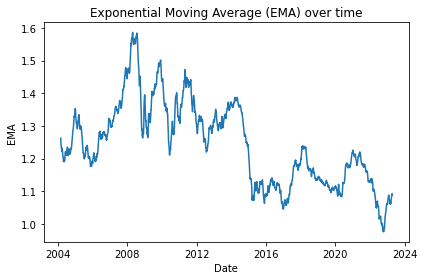

In [55]:
# Plot the EMA Values against Date
plt.plot(EMA_eurusd3.index, EMA_eurusd3['EMA'])
plt.xlabel('Date')
plt.ylabel('EMA')
plt.title('Exponential Moving Average (EMA) over time')
plt.tight_layout() 
plt.show()

In [56]:
## MACD
url = 'https://www.alphavantage.co/query?function=MACD&symbol=EURUSD&interval=daily&time_period=10&series_type=open&apikey={api_key}'
r = requests.get(url)
MACD = r.json()

pprint(MACD)

{'Meta Data': {'1: Symbol': 'EURUSD',
               '2: Indicator': 'Moving Average Convergence/Divergence (MACD)',
               '3: Last Refreshed': '2023-04-17 05:25:00',
               '4: Interval': 'daily',
               '5.1: Fast Period': 12,
               '5.2: Slow Period': 26,
               '5.3: Signal Period': 9,
               '6: Series Type': 'open',
               '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: MACD': {'2004-04-02': {'MACD': '-0.0074',
                                             'MACD_Hist': '0.0034',
                                             'MACD_Signal': '-0.0107'},
                              '2004-04-05': {'MACD': '-0.0079',
                                             'MACD_Hist': '0.0023',
                                             'MACD_Signal': '-0.0102'},
                              '2004-04-06': {'MACD': '-0.0091',
                                             'MACD_Hist': '0.0009',
                                        

                              '2004-07-02': {'MACD': '0.0016',
                                             'MACD_Hist': '0.0003',
                                             'MACD_Signal': '0.0014'},
                              '2004-07-05': {'MACD': '0.0030',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '0.0017'},
                              '2004-07-06': {'MACD': '0.0037',
                                             'MACD_Hist': '0.0016',
                                             'MACD_Signal': '0.0021'},
                              '2004-07-07': {'MACD': '0.0044',
                                             'MACD_Hist': '0.0018',
                                             'MACD_Signal': '0.0025'},
                              '2004-07-08': {'MACD': '0.0054',
                                             'MACD_Hist': '0.0023',
                                             'MACD_Signal': '

                              '2004-12-17': {'MACD': '0.0108',
                                             'MACD_Hist': '-0.0025',
                                             'MACD_Signal': '0.0133'},
                              '2004-12-20': {'MACD': '0.0102',
                                             'MACD_Hist': '-0.0024',
                                             'MACD_Signal': '0.0127'},
                              '2004-12-21': {'MACD': '0.0102',
                                             'MACD_Hist': '-0.0019',
                                             'MACD_Signal': '0.0122'},
                              '2004-12-22': {'MACD': '0.0099',
                                             'MACD_Hist': '-0.0018',
                                             'MACD_Signal': '0.0117'},
                              '2004-12-23': {'MACD': '0.0098',
                                             'MACD_Hist': '-0.0016',
                                             'MACD_Signa

                                             'MACD_Signal': '-0.0142'},
                              '2005-06-10': {'MACD': '-0.0157',
                                             'MACD_Hist': '-0.0012',
                                             'MACD_Signal': '-0.0145'},
                              '2005-06-13': {'MACD': '-0.0164',
                                             'MACD_Hist': '-0.0015',
                                             'MACD_Signal': '-0.0149'},
                              '2005-06-14': {'MACD': '-0.0167',
                                             'MACD_Hist': '-0.0015',
                                             'MACD_Signal': '-0.0152'},
                              '2005-06-15': {'MACD': '-0.0174',
                                             'MACD_Hist': '-0.0018',
                                             'MACD_Signal': '-0.0157'},
                              '2005-06-16': {'MACD': '-0.0171',
                                            

                                             'MACD_Signal': '-0.0063'},
                              '2005-12-02': {'MACD': '-0.0046',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0060'},
                              '2005-12-05': {'MACD': '-0.0049',
                                             'MACD_Hist': '0.0009',
                                             'MACD_Signal': '-0.0057'},
                              '2005-12-06': {'MACD': '-0.0043',
                                             'MACD_Hist': '0.0011',
                                             'MACD_Signal': '-0.0055'},
                              '2005-12-07': {'MACD': '-0.0038',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '-0.0051'},
                              '2005-12-08': {'MACD': '-0.0040',
                                             'MA

                                             'MACD_Signal': '0.0142'},
                              '2006-05-15': {'MACD': '0.0174',
                                             'MACD_Hist': '0.0025',
                                             'MACD_Signal': '0.0149'},
                              '2006-05-16': {'MACD': '0.0168',
                                             'MACD_Hist': '0.0016',
                                             'MACD_Signal': '0.0152'},
                              '2006-05-17': {'MACD': '0.0167',
                                             'MACD_Hist': '0.0011',
                                             'MACD_Signal': '0.0155'},
                              '2006-05-18': {'MACD': '0.0153',
                                             'MACD_Hist': '-0.0002',
                                             'MACD_Signal': '0.0155'},
                              '2006-05-19': {'MACD': '0.0151',
                                             'MACD_Hist':

                              '2006-08-22': {'MACD': '0.0040',
                                             'MACD_Hist': '0.0007',
                                             'MACD_Signal': '0.0034'},
                              '2006-08-23': {'MACD': '0.0037',
                                             'MACD_Hist': '0.0002',
                                             'MACD_Signal': '0.0034'},
                              '2006-08-24': {'MACD': '0.0032',
                                             'MACD_Hist': '-0.0002',
                                             'MACD_Signal': '0.0034'},
                              '2006-08-25': {'MACD': '0.0026',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '0.0032'},
                              '2006-08-28': {'MACD': '0.0021',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal'

                              '2007-02-13': {'MACD': '-0.0011',
                                             'MACD_Hist': '0.0007',
                                             'MACD_Signal': '-0.0018'},
                              '2007-02-14': {'MACD': '-0.0006',
                                             'MACD_Hist': '0.0010',
                                             'MACD_Signal': '-0.0016'},
                              '2007-02-15': {'MACD': '0.0006',
                                             'MACD_Hist': '0.0017',
                                             'MACD_Signal': '-0.0011'},
                              '2007-02-16': {'MACD': '0.0015',
                                             'MACD_Hist': '0.0021',
                                             'MACD_Signal': '-0.0006'},
                              '2007-02-19': {'MACD': '0.0023',
                                             'MACD_Hist': '0.0023',
                                             'MACD_Sign

                              '2007-08-07': {'MACD': '0.0039',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '0.0048'},
                              '2007-08-08': {'MACD': '0.0037',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '0.0046'},
                              '2007-08-09': {'MACD': '0.0039',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '0.0044'},
                              '2007-08-10': {'MACD': '0.0031',
                                             'MACD_Hist': '-0.0011',
                                             'MACD_Signal': '0.0042'},
                              '2007-08-13': {'MACD': '0.0025',
                                             'MACD_Hist': '-0.0014',
                                             'MACD_Signa

                                             'MACD_Signal': '0.0012'},
                              '2008-02-13': {'MACD': '-0.0024',
                                             'MACD_Hist': '-0.0029',
                                             'MACD_Signal': '0.0005'},
                              '2008-02-14': {'MACD': '-0.0028',
                                             'MACD_Hist': '-0.0027',
                                             'MACD_Signal': '-0.0002'},
                              '2008-02-15': {'MACD': '-0.0025',
                                             'MACD_Hist': '-0.0018',
                                             'MACD_Signal': '-0.0006'},
                              '2008-02-18': {'MACD': '-0.0018',
                                             'MACD_Hist': '-0.0010',
                                             'MACD_Signal': '-0.0009'},
                              '2008-02-19': {'MACD': '-0.0015',
                                             '

                                             'MACD_Signal': '-0.0222'},
                              '2008-08-27': {'MACD': '-0.0238',
                                             'MACD_Hist': '-0.0013',
                                             'MACD_Signal': '-0.0225'},
                              '2008-08-28': {'MACD': '-0.0232',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '-0.0226'},
                              '2008-08-29': {'MACD': '-0.0227',
                                             'MACD_Hist': '-0.0000',
                                             'MACD_Signal': '-0.0226'},
                              '2008-09-01': {'MACD': '-0.0220',
                                             'MACD_Hist': '0.0005',
                                             'MACD_Signal': '-0.0225'},
                              '2008-09-02': {'MACD': '-0.0218',
                                             

                              '2009-04-06': {'MACD': '0.0135',
                                             'MACD_Hist': '-0.0001',
                                             'MACD_Signal': '0.0136'},
                              '2009-04-07': {'MACD': '0.0130',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '0.0135'},
                              '2009-04-08': {'MACD': '0.0114',
                                             'MACD_Hist': '-0.0017',
                                             'MACD_Signal': '0.0131'},
                              '2009-04-09': {'MACD': '0.0100',
                                             'MACD_Hist': '-0.0025',
                                             'MACD_Signal': '0.0125'},
                              '2009-04-10': {'MACD': '0.0079',
                                             'MACD_Hist': '-0.0036',
                                             'MACD_Signa

                              '2009-10-01': {'MACD': '0.0088',
                                             'MACD_Hist': '-0.0019',
                                             'MACD_Signal': '0.0106'},
                              '2009-10-02': {'MACD': '0.0074',
                                             'MACD_Hist': '-0.0026',
                                             'MACD_Signal': '0.0100'},
                              '2009-10-05': {'MACD': '0.0065',
                                             'MACD_Hist': '-0.0028',
                                             'MACD_Signal': '0.0093'},
                              '2009-10-06': {'MACD': '0.0063',
                                             'MACD_Hist': '-0.0024',
                                             'MACD_Signal': '0.0087'},
                              '2009-10-07': {'MACD': '0.0067',
                                             'MACD_Hist': '-0.0016',
                                             'MACD_Signa

                                             'MACD_Signal': '-0.0083'},
                              '2010-03-17': {'MACD': '-0.0035',
                                             'MACD_Hist': '0.0039',
                                             'MACD_Signal': '-0.0073'},
                              '2010-03-18': {'MACD': '-0.0028',
                                             'MACD_Hist': '0.0037',
                                             'MACD_Signal': '-0.0064'},
                              '2010-03-19': {'MACD': '-0.0032',
                                             'MACD_Hist': '0.0026',
                                             'MACD_Signal': '-0.0058'},
                              '2010-03-22': {'MACD': '-0.0041',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '-0.0054'},
                              '2010-03-23': {'MACD': '-0.0045',
                                             'MA

                                             'MACD_Signal': '-0.0023'},
                              '2010-07-08': {'MACD': '0.0047',
                                             'MACD_Hist': '0.0056',
                                             'MACD_Signal': '-0.0009'},
                              '2010-07-09': {'MACD': '0.0064',
                                             'MACD_Hist': '0.0058',
                                             'MACD_Signal': '0.0006'},
                              '2010-07-12': {'MACD': '0.0071',
                                             'MACD_Hist': '0.0052',
                                             'MACD_Signal': '0.0019'},
                              '2010-07-13': {'MACD': '0.0072',
                                             'MACD_Hist': '0.0043',
                                             'MACD_Signal': '0.0030'},
                              '2010-07-14': {'MACD': '0.0083',
                                             'MACD_Hist'

                              '2011-03-10': {'MACD': '0.0106',
                                             'MACD_Hist': '0.0012',
                                             'MACD_Signal': '0.0094'},
                              '2011-03-11': {'MACD': '0.0094',
                                             'MACD_Hist': '-0.0000',
                                             'MACD_Signal': '0.0094'},
                              '2011-03-14': {'MACD': '0.0097',
                                             'MACD_Hist': '0.0002',
                                             'MACD_Signal': '0.0095'},
                              '2011-03-15': {'MACD': '0.0100',
                                             'MACD_Hist': '0.0004',
                                             'MACD_Signal': '0.0096'},
                              '2011-03-16': {'MACD': '0.0102',
                                             'MACD_Hist': '0.0005',
                                             'MACD_Signal': 

                              '2011-10-24': {'MACD': '0.0010',
                                             'MACD_Hist': '0.0055',
                                             'MACD_Signal': '-0.0046'},
                              '2011-10-25': {'MACD': '0.0026',
                                             'MACD_Hist': '0.0057',
                                             'MACD_Signal': '-0.0031'},
                              '2011-10-26': {'MACD': '0.0037',
                                             'MACD_Hist': '0.0054',
                                             'MACD_Signal': '-0.0018'},
                              '2011-10-27': {'MACD': '0.0044',
                                             'MACD_Hist': '0.0049',
                                             'MACD_Signal': '-0.0005'},
                              '2011-10-28': {'MACD': '0.0071',
                                             'MACD_Hist': '0.0061',
                                             'MACD_Signal

                                             'MACD_Hist': '-0.0035',
                                             'MACD_Signal': '-0.0081'},
                              '2012-05-22': {'MACD': '-0.0113',
                                             'MACD_Hist': '-0.0025',
                                             'MACD_Signal': '-0.0087'},
                              '2012-05-23': {'MACD': '-0.0119',
                                             'MACD_Hist': '-0.0025',
                                             'MACD_Signal': '-0.0093'},
                              '2012-05-24': {'MACD': '-0.0130',
                                             'MACD_Hist': '-0.0029',
                                             'MACD_Signal': '-0.0101'},
                              '2012-05-25': {'MACD': '-0.0141',
                                             'MACD_Hist': '-0.0032',
                                             'MACD_Signal': '-0.0109'},
                              '2012-05-

                              '2013-02-07': {'MACD': '0.0104',
                                             'MACD_Hist': '0.0007',
                                             'MACD_Signal': '0.0097'},
                              '2013-02-08': {'MACD': '0.0089',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '0.0095'},
                              '2013-02-11': {'MACD': '0.0074',
                                             'MACD_Hist': '-0.0017',
                                             'MACD_Signal': '0.0091'},
                              '2013-02-12': {'MACD': '0.0064',
                                             'MACD_Hist': '-0.0022',
                                             'MACD_Signal': '0.0086'},
                              '2013-02-13': {'MACD': '0.0059',
                                             'MACD_Hist': '-0.0021',
                                             'MACD_Signal

                                             'MACD_Signal': '0.0029'},
                              '2013-08-01': {'MACD': '0.0057',
                                             'MACD_Hist': '0.0023',
                                             'MACD_Signal': '0.0035'},
                              '2013-08-02': {'MACD': '0.0053',
                                             'MACD_Hist': '0.0015',
                                             'MACD_Signal': '0.0038'},
                              '2013-08-05': {'MACD': '0.0055',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '0.0042'},
                              '2013-08-06': {'MACD': '0.0054',
                                             'MACD_Hist': '0.0010',
                                             'MACD_Signal': '0.0044'},
                              '2013-08-07': {'MACD': '0.0056',
                                             'MACD_Hist': 

                              '2014-01-15': {'MACD': '-0.0002',
                                             'MACD_Hist': '-0.0007',
                                             'MACD_Signal': '0.0005'},
                              '2014-01-16': {'MACD': '-0.0006',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '0.0003'},
                              '2014-01-17': {'MACD': '-0.0008',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '0.0001'},
                              '2014-01-20': {'MACD': '-0.0017',
                                             'MACD_Hist': '-0.0014',
                                             'MACD_Signal': '-0.0003'},
                              '2014-01-21': {'MACD': '-0.0021',
                                             'MACD_Hist': '-0.0015',
                                             'MACD

                              '2014-06-23': {'MACD': '-0.0036',
                                             'MACD_Hist': '0.0008',
                                             'MACD_Signal': '-0.0045'},
                              '2014-06-24': {'MACD': '-0.0032',
                                             'MACD_Hist': '0.0010',
                                             'MACD_Signal': '-0.0042'},
                              '2014-06-25': {'MACD': '-0.0029',
                                             'MACD_Hist': '0.0011',
                                             'MACD_Signal': '-0.0040'},
                              '2014-06-26': {'MACD': '-0.0024',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '-0.0036'},
                              '2014-06-27': {'MACD': '-0.0021',
                                             'MACD_Hist': '0.0012',
                                             'MACD_S

                                             'MACD_Signal': '-0.0095'},
                              '2015-01-08': {'MACD': '-0.0137',
                                             'MACD_Hist': '-0.0033',
                                             'MACD_Signal': '-0.0104'},
                              '2015-01-09': {'MACD': '-0.0147',
                                             'MACD_Hist': '-0.0035',
                                             'MACD_Signal': '-0.0112'},
                              '2015-01-12': {'MACD': '-0.0147',
                                             'MACD_Hist': '-0.0028',
                                             'MACD_Signal': '-0.0119'},
                              '2015-01-13': {'MACD': '-0.0149',
                                             'MACD_Hist': '-0.0024',
                                             'MACD_Signal': '-0.0125'},
                              '2015-01-14': {'MACD': '-0.0153',
                                            

                              '2015-09-28': {'MACD': '0.0006',
                                             'MACD_Hist': '-0.0019',
                                             'MACD_Signal': '0.0025'},
                              '2015-09-29': {'MACD': '0.0006',
                                             'MACD_Hist': '-0.0015',
                                             'MACD_Signal': '0.0021'},
                              '2015-09-30': {'MACD': '0.0008',
                                             'MACD_Hist': '-0.0010',
                                             'MACD_Signal': '0.0018'},
                              '2015-10-01': {'MACD': '0.0003',
                                             'MACD_Hist': '-0.0012',
                                             'MACD_Signal': '0.0015'},
                              '2015-10-02': {'MACD': '0.0000',
                                             'MACD_Hist': '-0.0012',
                                             'MACD_Signa

                              '2016-05-13': {'MACD': '0.0034',
                                             'MACD_Hist': '-0.0007',
                                             'MACD_Signal': '0.0041'},
                              '2016-05-16': {'MACD': '0.0025',
                                             'MACD_Hist': '-0.0013',
                                             'MACD_Signal': '0.0037'},
                              '2016-05-17': {'MACD': '0.0018',
                                             'MACD_Hist': '-0.0016',
                                             'MACD_Signal': '0.0033'},
                              '2016-05-18': {'MACD': '0.0011',
                                             'MACD_Hist': '-0.0018',
                                             'MACD_Signal': '0.0029'},
                              '2016-05-19': {'MACD': '-0.0000',
                                             'MACD_Hist': '-0.0024',
                                             'MACD_Sign

                                             'MACD_Signal': '-0.0080'},
                              '2017-01-03': {'MACD': '-0.0062',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0076'},
                              '2017-01-04': {'MACD': '-0.0063',
                                             'MACD_Hist': '0.0011',
                                             'MACD_Signal': '-0.0073'},
                              '2017-01-05': {'MACD': '-0.0056',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0070'},
                              '2017-01-06': {'MACD': '-0.0042',
                                             'MACD_Hist': '0.0023',
                                             'MACD_Signal': '-0.0064'},
                              '2017-01-09': {'MACD': '-0.0035',
                                             'MA

                              '2017-06-05': {'MACD': '0.0099',
                                             'MACD_Hist': '0.0001',
                                             'MACD_Signal': '0.0098'},
                              '2017-06-06': {'MACD': '0.0098',
                                             'MACD_Hist': '-0.0000',
                                             'MACD_Signal': '0.0098'},
                              '2017-06-07': {'MACD': '0.0098',
                                             'MACD_Hist': '-0.0000',
                                             'MACD_Signal': '0.0098'},
                              '2017-06-08': {'MACD': '0.0095',
                                             'MACD_Hist': '-0.0003',
                                             'MACD_Signal': '0.0097'},
                              '2017-06-09': {'MACD': '0.0087',
                                             'MACD_Hist': '-0.0008',
                                             'MACD_Signal

                              '2017-12-04': {'MACD': '0.0042',
                                             'MACD_Hist': '0.0015',
                                             'MACD_Signal': '0.0027'},
                              '2017-12-05': {'MACD': '0.0042',
                                             'MACD_Hist': '0.0012',
                                             'MACD_Signal': '0.0030'},
                              '2017-12-06': {'MACD': '0.0039',
                                             'MACD_Hist': '0.0007',
                                             'MACD_Signal': '0.0032'},
                              '2017-12-07': {'MACD': '0.0033',
                                             'MACD_Hist': '0.0001',
                                             'MACD_Signal': '0.0032'},
                              '2017-12-08': {'MACD': '0.0026',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': 

                                             'MACD_Signal': '-0.0113'},
                              '2018-05-28': {'MACD': '-0.0121',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '-0.0115'},
                              '2018-05-29': {'MACD': '-0.0126',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '-0.0117'},
                              '2018-05-30': {'MACD': '-0.0135',
                                             'MACD_Hist': '-0.0014',
                                             'MACD_Signal': '-0.0121'},
                              '2018-05-31': {'MACD': '-0.0131',
                                             'MACD_Hist': '-0.0008',
                                             'MACD_Signal': '-0.0123'},
                              '2018-06-01': {'MACD': '-0.0123',
                                            

                                             'MACD_Signal': '-0.0011'},
                              '2018-12-24': {'MACD': '-0.0001',
                                             'MACD_Hist': '0.0008',
                                             'MACD_Signal': '-0.0009'},
                              '2018-12-25': {'MACD': '0.0002',
                                             'MACD_Hist': '0.0009',
                                             'MACD_Signal': '-0.0007'},
                              '2018-12-26': {'MACD': '0.0005',
                                             'MACD_Hist': '0.0009',
                                             'MACD_Signal': '-0.0005'},
                              '2018-12-27': {'MACD': '0.0002',
                                             'MACD_Hist': '0.0005',
                                             'MACD_Signal': '-0.0003'},
                              '2018-12-28': {'MACD': '0.0006',
                                             'MACD_H

                              '2019-07-02': {'MACD': '0.0034',
                                             'MACD_Hist': '0.0003',
                                             'MACD_Signal': '0.0031'},
                              '2019-07-03': {'MACD': '0.0029',
                                             'MACD_Hist': '-0.0001',
                                             'MACD_Signal': '0.0030'},
                              '2019-07-04': {'MACD': '0.0025',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '0.0029'},
                              '2019-07-05': {'MACD': '0.0021',
                                             'MACD_Hist': '-0.0007',
                                             'MACD_Signal': '0.0028'},
                              '2019-07-08': {'MACD': '0.0013',
                                             'MACD_Hist': '-0.0012',
                                             'MACD_Signal

                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '-0.0007'},
                              '2019-12-02': {'MACD': '-0.0013',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '-0.0009'},
                              '2019-12-03': {'MACD': '-0.0009',
                                             'MACD_Hist': '-0.0000',
                                             'MACD_Signal': '-0.0009'},
                              '2019-12-04': {'MACD': '-0.0005',
                                             'MACD_Hist': '0.0003',
                                             'MACD_Signal': '-0.0008'},
                              '2019-12-05': {'MACD': '-0.0002',
                                             'MACD_Hist': '0.0005',
                                             'MACD_Signal': '-0.0007'},
                              '2019-12-06

                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '0.0045'},
                              '2020-07-13': {'MACD': '0.0041',
                                             'MACD_Hist': '-0.0003',
                                             'MACD_Signal': '0.0044'},
                              '2020-07-14': {'MACD': '0.0043',
                                             'MACD_Hist': '-0.0001',
                                             'MACD_Signal': '0.0044'},
                              '2020-07-15': {'MACD': '0.0050',
                                             'MACD_Hist': '0.0004',
                                             'MACD_Signal': '0.0045'},
                              '2020-07-16': {'MACD': '0.0054',
                                             'MACD_Hist': '0.0007',
                                             'MACD_Signal': '0.0047'},
                              '2020-07-17': {'MACD

                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '0.0077'},
                              '2021-01-04': {'MACD': '0.0069',
                                             'MACD_Hist': '-0.0007',
                                             'MACD_Signal': '0.0076'},
                              '2021-01-05': {'MACD': '0.0067',
                                             'MACD_Hist': '-0.0007',
                                             'MACD_Signal': '0.0074'},
                              '2021-01-06': {'MACD': '0.0068',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '0.0073'},
                              '2021-01-07': {'MACD': '0.0071',
                                             'MACD_Hist': '-0.0002',
                                             'MACD_Signal': '0.0072'},
                              '2021-01-08': {'MA

                                             'MACD_Hist': '0.0006',
                                             'MACD_Signal': '0.0042'},
                              '2021-05-13': {'MACD': '0.0044',
                                             'MACD_Hist': '0.0001',
                                             'MACD_Signal': '0.0042'},
                              '2021-05-14': {'MACD': '0.0041',
                                             'MACD_Hist': '-0.0002',
                                             'MACD_Signal': '0.0042'},
                              '2021-05-17': {'MACD': '0.0042',
                                             'MACD_Hist': '0.0000',
                                             'MACD_Signal': '0.0042'},
                              '2021-05-18': {'MACD': '0.0044',
                                             'MACD_Hist': '0.0002',
                                             'MACD_Signal': '0.0043'},
                              '2021-05-19': {'MACD':

                                             'MACD_Signal': '0.0001'},
                              '2021-09-22': {'MACD': '-0.0014',
                                             'MACD_Hist': '-0.0012',
                                             'MACD_Signal': '-0.0002'},
                              '2021-09-23': {'MACD': '-0.0019',
                                             'MACD_Hist': '-0.0014',
                                             'MACD_Signal': '-0.0005'},
                              '2021-09-24': {'MACD': '-0.0020',
                                             'MACD_Hist': '-0.0011',
                                             'MACD_Signal': '-0.0008'},
                              '2021-09-27': {'MACD': '-0.0022',
                                             'MACD_Hist': '-0.0011',
                                             'MACD_Signal': '-0.0011'},
                              '2021-09-28': {'MACD': '-0.0025',
                                             

                              '2022-03-23': {'MACD': '-0.0064',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0078'},
                              '2022-03-24': {'MACD': '-0.0061',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0074'},
                              '2022-03-25': {'MACD': '-0.0059',
                                             'MACD_Hist': '0.0013',
                                             'MACD_Signal': '-0.0071'},
                              '2022-03-28': {'MACD': '-0.0057',
                                             'MACD_Hist': '0.0011',
                                             'MACD_Signal': '-0.0068'},
                              '2022-03-29': {'MACD': '-0.0056',
                                             'MACD_Hist': '0.0010',
                                             'MACD_S

                                             'MACD_Signal': '-0.0067'},
                              '2022-09-07': {'MACD': '-0.0075',
                                             'MACD_Hist': '-0.0006',
                                             'MACD_Signal': '-0.0068'},
                              '2022-09-08': {'MACD': '-0.0067',
                                             'MACD_Hist': '0.0001',
                                             'MACD_Signal': '-0.0068'},
                              '2022-09-09': {'MACD': '-0.0061',
                                             'MACD_Hist': '0.0005',
                                             'MACD_Signal': '-0.0067'},
                              '2022-09-12': {'MACD': '-0.0049',
                                             'MACD_Hist': '0.0014',
                                             'MACD_Signal': '-0.0063'},
                              '2022-09-13': {'MACD': '-0.0036',
                                             'M

                                             'MACD_Signal': '-0.0024'},
                              '2023-03-01': {'MACD': '-0.0047',
                                             'MACD_Hist': '-0.0018',
                                             'MACD_Signal': '-0.0028'},
                              '2023-03-02': {'MACD': '-0.0041',
                                             'MACD_Hist': '-0.0010',
                                             'MACD_Signal': '-0.0031'},
                              '2023-03-03': {'MACD': '-0.0042',
                                             'MACD_Hist': '-0.0009',
                                             'MACD_Signal': '-0.0033'},
                              '2023-03-06': {'MACD': '-0.0040',
                                             'MACD_Hist': '-0.0005',
                                             'MACD_Signal': '-0.0034'},
                              '2023-03-07': {'MACD': '-0.0033',
                                            

In [57]:
# Convert JSON to DataFrame
MACD = pd.DataFrame(MACD)
MACD_eurusd = MACD.iloc[10:]
MACD_eurusd = MACD_eurusd.drop('Meta Data', axis=1)
MACD_eurusd.head()

Technical Analysis: MACD
2023-04-14  {'MACD': '0.0071', 'MACD_Signal': '0.0059', 'M...
2023-04-13  {'MACD': '0.0063', 'MACD_Signal': '0.0056', 'M...
2023-04-12  {'MACD': '0.0057', 'MACD_Signal': '0.0054', 'M...
2023-04-11  {'MACD': '0.0058', 'MACD_Signal': '0.0053', 'M...
2023-04-10  {'MACD': '0.0063', 'MACD_Signal': '0.0052', 'M...

In [58]:
# Reset the index, which moves the index back to a column in the DataFrame
MACD_eurusd.reset_index(inplace=True)

# Rename the column containing the datetime index to 'Date'
MACD_eurusd.rename(columns={'index': 'Date'}, inplace=True)

# Separate the SMA values and Concat within Dataframe
MACD_eurusd2 = pd.concat([MACD_eurusd[['Date',f'Technical Analysis: MACD']],pd.json_normalize(MACD_eurusd[f'Technical Analysis: MACD']) ],axis=1)

# Quick overlook on the uploaded dataset
MACD_eurusd2.head()

Date                           Technical Analysis: MACD    MACD  \
0  2023-04-14  {'MACD': '0.0071', 'MACD_Signal': '0.0059', 'M...  0.0071   
1  2023-04-13  {'MACD': '0.0063', 'MACD_Signal': '0.0056', 'M...  0.0063   
2  2023-04-12  {'MACD': '0.0057', 'MACD_Signal': '0.0054', 'M...  0.0057   
3  2023-04-11  {'MACD': '0.0058', 'MACD_Signal': '0.0053', 'M...  0.0058   
4  2023-04-10  {'MACD': '0.0063', 'MACD_Signal': '0.0052', 'M...  0.0063   

  MACD_Signal MACD_Hist  
0      0.0059    0.0012  
1      0.0056    0.0007  
2      0.0054    0.0003  
3      0.0053    0.0005  
4      0.0052    0.0011

In [59]:
# Create new dataframe for the columns 'Date' and 'SMA' Values
MACD_eurusd3 = MACD_eurusd2[['Date','MACD', 'MACD_Signal', 'MACD_Hist']]

# Convert 'Date' column to datetime index
MACD_eurusd3['Date'] = pd.to_datetime(MACD_eurusd3['Date'])
MACD_eurusd3.set_index('Date', inplace=True)

# Convert the 'MACD_Value' column to float
MACD_eurusd3[['MACD', 'MACD_Signal', 'MACD_Hist']] = MACD_eurusd3[['MACD', 'MACD_Signal', 'MACD_Hist']].astype(float)

# Verify the result
MACD_eurusd3.head()

MACD  MACD_Signal  MACD_Hist
Date                                      
2023-04-14  0.0071       0.0059     0.0012
2023-04-13  0.0063       0.0056     0.0007
2023-04-12  0.0057       0.0054     0.0003
2023-04-11  0.0058       0.0053     0.0005
2023-04-10  0.0063       0.0052     0.0011

In [122]:
# Present the MACD Values as Statistical data
macd_stats = MACD_eurusd3[['MACD', 'MACD_Signal', 'MACD_Hist']].describe()
print(macd_stats)

              MACD  MACD_Signal    MACD_Hist
count  4966.000000  4966.000000  4966.000000
mean     -0.000237    -0.000253     0.000015
std       0.008259     0.007815     0.002414
min      -0.041000    -0.035900    -0.012000
25%      -0.004675    -0.004400    -0.001400
50%      -0.000250    -0.000100     0.000100
75%       0.004800     0.004500     0.001400
max       0.031200     0.027100     0.018000


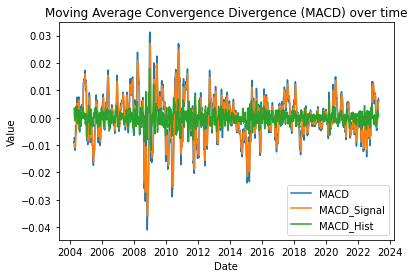

In [60]:
# Plot 'MACD', 'MACD_Signal', and 'MACD_Hist' Values against Date
plt.plot(MACD_eurusd3.index, MACD_eurusd3['MACD'], label='MACD')
plt.plot(MACD_eurusd3.index, MACD_eurusd3['MACD_Signal'], label='MACD_Signal')
plt.plot(MACD_eurusd3.index, MACD_eurusd3['MACD_Hist'], label='MACD_Hist')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Moving Average Convergence Divergence (MACD) over time')
plt.legend()
plt.show()

In [61]:
## BBANDS
url = 'https://www.alphavantage.co/query?function=BBANDS&symbol=EURUSD&interval=daily&time_period=10&series_type=open&apikey={api_key}'
r = requests.get(url)
BBANDS = r.json()

pprint(BBANDS)

{'Meta Data': {'1: Symbol': 'EURUSD',
               '2: Indicator': 'Bollinger Bands (BBANDS)',
               '3: Last Refreshed': '2023-04-17 05:25:00',
               '4: Interval': 'daily',
               '5: Time Period': 10,
               '6.1: Deviation multiplier for upper band': 2,
               '6.2: Deviation multiplier for lower band': 2,
               '6.3: MA Type': 0,
               '7: Series Type': 'open',
               '8: Time Zone': 'US/Eastern Time'},
 'Technical Analysis: BBANDS': {'2004-03-01': {'Real Lower Band': '1.2342',
                                               'Real Middle Band': '1.2622',
                                               'Real Upper Band': '1.2902'},
                                '2004-03-02': {'Real Lower Band': '1.2325',
                                               'Real Middle Band': '1.2583',
                                               'Real Upper Band': '1.2841'},
                                '2004-03-03': {'Real Lower

                                '2004-09-20': {'Real Lower Band': '1.2101',
                                               'Real Middle Band': '1.2192',
                                               'Real Upper Band': '1.2283'},
                                '2004-09-21': {'Real Lower Band': '1.2126',
                                               'Real Middle Band': '1.2198',
                                               'Real Upper Band': '1.2270'},
                                '2004-09-22': {'Real Lower Band': '1.2104',
                                               'Real Middle Band': '1.2213',
                                               'Real Upper Band': '1.2322'},
                                '2004-09-23': {'Real Lower Band': '1.2111',
                                               'Real Middle Band': '1.2221',
                                               'Real Upper Band': '1.2330'},
                                '2004-09-24': {'Real Lower Band': '1.2117',
    

                                               'Real Upper Band': '1.3539'},
                                '2005-03-18': {'Real Lower Band': '1.3242',
                                               'Real Middle Band': '1.3366',
                                               'Real Upper Band': '1.3490'},
                                '2005-03-21': {'Real Lower Band': '1.3279',
                                               'Real Middle Band': '1.3374',
                                               'Real Upper Band': '1.3469'},
                                '2005-03-22': {'Real Lower Band': '1.3206',
                                               'Real Middle Band': '1.3358',
                                               'Real Upper Band': '1.3510'},
                                '2005-03-23': {'Real Lower Band': '1.3108',
                                               'Real Middle Band': '1.3332',
                                               'Real Upper Band': '1.3556'},
   

                                               'Real Upper Band': '1.1875'},
                                '2005-12-01': {'Real Lower Band': '1.1693',
                                               'Real Middle Band': '1.1781',
                                               'Real Upper Band': '1.1868'},
                                '2005-12-02': {'Real Lower Band': '1.1691',
                                               'Real Middle Band': '1.1780',
                                               'Real Upper Band': '1.1869'},
                                '2005-12-05': {'Real Lower Band': '1.1673',
                                               'Real Middle Band': '1.1773',
                                               'Real Upper Band': '1.1874'},
                                '2005-12-06': {'Real Lower Band': '1.1686',
                                               'Real Middle Band': '1.1780',
                                               'Real Upper Band': '1.1875'},
   

                                '2006-07-21': {'Real Lower Band': '1.2466',
                                               'Real Middle Band': '1.2658',
                                               'Real Upper Band': '1.2851'},
                                '2006-07-24': {'Real Lower Band': '1.2480',
                                               'Real Middle Band': '1.2647',
                                               'Real Upper Band': '1.2815'},
                                '2006-07-25': {'Real Lower Band': '1.2481',
                                               'Real Middle Band': '1.2637',
                                               'Real Upper Band': '1.2793'},
                                '2006-07-26': {'Real Lower Band': '1.2485',
                                               'Real Middle Band': '1.2619',
                                               'Real Upper Band': '1.2752'},
                                '2006-07-27': {'Real Lower Band': '1.2483',
    

                                '2007-02-12': {'Real Lower Band': '1.2919',
                                               'Real Middle Band': '1.2989',
                                               'Real Upper Band': '1.3059'},
                                '2007-02-13': {'Real Lower Band': '1.2922',
                                               'Real Middle Band': '1.2990',
                                               'Real Upper Band': '1.3058'},
                                '2007-02-14': {'Real Lower Band': '1.2925',
                                               'Real Middle Band': '1.2997',
                                               'Real Upper Band': '1.3069'},
                                '2007-02-15': {'Real Lower Band': '1.2901',
                                               'Real Middle Band': '1.3007',
                                               'Real Upper Band': '1.3113'},
                                '2007-02-16': {'Real Lower Band': '1.2885',
    

                                '2007-08-06': {'Real Lower Band': '1.3601',
                                               'Real Middle Band': '1.3726',
                                               'Real Upper Band': '1.3851'},
                                '2007-08-07': {'Real Lower Band': '1.3603',
                                               'Real Middle Band': '1.3724',
                                               'Real Upper Band': '1.3846'},
                                '2007-08-08': {'Real Lower Band': '1.3613',
                                               'Real Middle Band': '1.3716',
                                               'Real Upper Band': '1.3819'},
                                '2007-08-09': {'Real Lower Band': '1.3610',
                                               'Real Middle Band': '1.3723',
                                               'Real Upper Band': '1.3837'},
                                '2007-08-10': {'Real Lower Band': '1.3601',
    

                                               'Real Upper Band': '1.4910'},
                                '2008-01-28': {'Real Lower Band': '1.4451',
                                               'Real Middle Band': '1.4670',
                                               'Real Upper Band': '1.4889'},
                                '2008-01-29': {'Real Lower Band': '1.4469',
                                               'Real Middle Band': '1.4661',
                                               'Real Upper Band': '1.4852'},
                                '2008-01-30': {'Real Lower Band': '1.4474',
                                               'Real Middle Band': '1.4658',
                                               'Real Upper Band': '1.4842'},
                                '2008-01-31': {'Real Lower Band': '1.4459',
                                               'Real Middle Band': '1.4679',
                                               'Real Upper Band': '1.4899'},
   

                                               'Real Middle Band': '1.4222',
                                               'Real Upper Band': '1.4565'},
                                '2008-09-17': {'Real Lower Band': '1.3892',
                                               'Real Middle Band': '1.4180',
                                               'Real Upper Band': '1.4467'},
                                '2008-09-18': {'Real Lower Band': '1.3936',
                                               'Real Middle Band': '1.4163',
                                               'Real Upper Band': '1.4390'},
                                '2008-09-19': {'Real Lower Band': '1.3928',
                                               'Real Middle Band': '1.4172',
                                               'Real Upper Band': '1.4416'},
                                '2008-09-22': {'Real Lower Band': '1.3893',
                                               'Real Middle Band': '1.4192',
   

                                '2009-01-21': {'Real Lower Band': '1.2802',
                                               'Real Middle Band': '1.3288',
                                               'Real Upper Band': '1.3774'},
                                '2009-01-22': {'Real Lower Band': '1.2781',
                                               'Real Middle Band': '1.3226',
                                               'Real Upper Band': '1.3670'},
                                '2009-01-23': {'Real Lower Band': '1.2826',
                                               'Real Middle Band': '1.3156',
                                               'Real Upper Band': '1.3486'},
                                '2009-01-26': {'Real Lower Band': '1.2837',
                                               'Real Middle Band': '1.3106',
                                               'Real Upper Band': '1.3375'},
                                '2009-01-27': {'Real Lower Band': '1.2868',
    

                                               'Real Upper Band': '1.4172'},
                                '2009-07-06': {'Real Lower Band': '1.3851',
                                               'Real Middle Band': '1.4012',
                                               'Real Upper Band': '1.4172'},
                                '2009-07-07': {'Real Lower Band': '1.3896',
                                               'Real Middle Band': '1.4023',
                                               'Real Upper Band': '1.4151'},
                                '2009-07-08': {'Real Lower Band': '1.3871',
                                               'Real Middle Band': '1.4008',
                                               'Real Upper Band': '1.4144'},
                                '2009-07-09': {'Real Lower Band': '1.3849',
                                               'Real Middle Band': '1.4002',
                                               'Real Upper Band': '1.4155'},
   

                                '2010-01-01': {'Real Lower Band': '1.4251',
                                               'Real Middle Band': '1.4334',
                                               'Real Upper Band': '1.4418'},
                                '2010-01-04': {'Real Lower Band': '1.4249',
                                               'Real Middle Band': '1.4333',
                                               'Real Upper Band': '1.4416'},
                                '2010-01-05': {'Real Lower Band': '1.4261',
                                               'Real Middle Band': '1.4346',
                                               'Real Upper Band': '1.4432'},
                                '2010-01-06': {'Real Lower Band': '1.4303',
                                               'Real Middle Band': '1.4358',
                                               'Real Upper Band': '1.4414'},
                                '2010-01-07': {'Real Lower Band': '1.4304',
    

                                '2010-09-02': {'Real Lower Band': '1.2586',
                                               'Real Middle Band': '1.2709',
                                               'Real Upper Band': '1.2832'},
                                '2010-09-03': {'Real Lower Band': '1.2584',
                                               'Real Middle Band': '1.2710',
                                               'Real Upper Band': '1.2836'},
                                '2010-09-06': {'Real Lower Band': '1.2562',
                                               'Real Middle Band': '1.2729',
                                               'Real Upper Band': '1.2896'},
                                '2010-09-07': {'Real Lower Band': '1.2574',
                                               'Real Middle Band': '1.2752',
                                               'Real Upper Band': '1.2929'},
                                '2010-09-08': {'Real Lower Band': '1.2591',
    

                                '2011-03-03': {'Real Lower Band': '1.3587',
                                               'Real Middle Band': '1.3739',
                                               'Real Upper Band': '1.3890'},
                                '2011-03-04': {'Real Lower Band': '1.3596',
                                               'Real Middle Band': '1.3775',
                                               'Real Upper Band': '1.3954'},
                                '2011-03-07': {'Real Lower Band': '1.3593',
                                               'Real Middle Band': '1.3804',
                                               'Real Upper Band': '1.4015'},
                                '2011-03-08': {'Real Lower Band': '1.3620',
                                               'Real Middle Band': '1.3833',
                                               'Real Upper Band': '1.4046'},
                                '2011-03-09': {'Real Lower Band': '1.3681',
    

                                               'Real Upper Band': '1.3983'},
                                '2011-10-20': {'Real Lower Band': '1.3378',
                                               'Real Middle Band': '1.3675',
                                               'Real Upper Band': '1.3972'},
                                '2011-10-21': {'Real Lower Band': '1.3459',
                                               'Real Middle Band': '1.3710',
                                               'Real Upper Band': '1.3960'},
                                '2011-10-24': {'Real Lower Band': '1.3609',
                                               'Real Middle Band': '1.3758',
                                               'Real Upper Band': '1.3907'},
                                '2011-10-25': {'Real Lower Band': '1.3631',
                                               'Real Middle Band': '1.3788',
                                               'Real Upper Band': '1.3945'},
   

                                               'Real Upper Band': '1.2974'},
                                '2012-01-24': {'Real Lower Band': '1.2567',
                                               'Real Middle Band': '1.2805',
                                               'Real Upper Band': '1.3042'},
                                '2012-01-25': {'Real Lower Band': '1.2558',
                                               'Real Middle Band': '1.2830',
                                               'Real Upper Band': '1.3103'},
                                '2012-01-26': {'Real Lower Band': '1.2567',
                                               'Real Middle Band': '1.2870',
                                               'Real Upper Band': '1.3173'},
                                '2012-01-27': {'Real Lower Band': '1.2568',
                                               'Real Middle Band': '1.2899',
                                               'Real Upper Band': '1.3230'},
   

                                '2012-11-09': {'Real Lower Band': '1.2699',
                                               'Real Middle Band': '1.2862',
                                               'Real Upper Band': '1.3026'},
                                '2012-11-12': {'Real Lower Band': '1.2662',
                                               'Real Middle Band': '1.2839',
                                               'Real Upper Band': '1.3016'},
                                '2012-11-13': {'Real Lower Band': '1.2632',
                                               'Real Middle Band': '1.2820',
                                               'Real Upper Band': '1.3007'},
                                '2012-11-14': {'Real Lower Band': '1.2621',
                                               'Real Middle Band': '1.2794',
                                               'Real Upper Band': '1.2967'},
                                '2012-11-15': {'Real Lower Band': '1.2634',
    

                                               'Real Middle Band': '1.3264',
                                               'Real Upper Band': '1.3493'},
                                '2013-06-27': {'Real Lower Band': '1.2962',
                                               'Real Middle Band': '1.3231',
                                               'Real Upper Band': '1.3500'},
                                '2013-06-28': {'Real Lower Band': '1.2923',
                                               'Real Middle Band': '1.3197',
                                               'Real Upper Band': '1.3472'},
                                '2013-07-01': {'Real Lower Band': '1.2889',
                                               'Real Middle Band': '1.3164',
                                               'Real Upper Band': '1.3438'},
                                '2013-07-02': {'Real Lower Band': '1.2888',
                                               'Real Middle Band': '1.3134',
   

                                '2013-10-25': {'Real Lower Band': '1.3453',
                                               'Real Middle Band': '1.3655',
                                               'Real Upper Band': '1.3857'},
                                '2013-10-28': {'Real Lower Band': '1.3471',
                                               'Real Middle Band': '1.3680',
                                               'Real Upper Band': '1.3889'},
                                '2013-10-29': {'Real Lower Band': '1.3503',
                                               'Real Middle Band': '1.3703',
                                               'Real Upper Band': '1.3902'},
                                '2013-10-30': {'Real Lower Band': '1.3564',
                                               'Real Middle Band': '1.3725',
                                               'Real Upper Band': '1.3885'},
                                '2013-10-31': {'Real Lower Band': '1.3647',
    

                                '2014-04-18': {'Real Lower Band': '1.3705',
                                               'Real Middle Band': '1.3809',
                                               'Real Upper Band': '1.3913'},
                                '2014-04-21': {'Real Lower Band': '1.3746',
                                               'Real Middle Band': '1.3821',
                                               'Real Upper Band': '1.3895'},
                                '2014-04-22': {'Real Lower Band': '1.3769',
                                               'Real Middle Band': '1.3826',
                                               'Real Upper Band': '1.3883'},
                                '2014-04-23': {'Real Lower Band': '1.3772',
                                               'Real Middle Band': '1.3827',
                                               'Real Upper Band': '1.3882'},
                                '2014-04-24': {'Real Lower Band': '1.3771',
    

                                '2014-10-10': {'Real Lower Band': '1.2543',
                                               'Real Middle Band': '1.2654',
                                               'Real Upper Band': '1.2765'},
                                '2014-10-13': {'Real Lower Band': '1.2538',
                                               'Real Middle Band': '1.2649',
                                               'Real Upper Band': '1.2759'},
                                '2014-10-14': {'Real Lower Band': '1.2532',
                                               'Real Middle Band': '1.2654',
                                               'Real Upper Band': '1.2776'},
                                '2014-10-15': {'Real Lower Band': '1.2536',
                                               'Real Middle Band': '1.2657',
                                               'Real Upper Band': '1.2777'},
                                '2014-10-16': {'Real Lower Band': '1.2527',
    

                                '2015-04-03': {'Real Lower Band': '1.0726',
                                               'Real Middle Band': '1.0865',
                                               'Real Upper Band': '1.1005'},
                                '2015-04-06': {'Real Lower Band': '1.0722',
                                               'Real Middle Band': '1.0882',
                                               'Real Upper Band': '1.1041'},
                                '2015-04-07': {'Real Lower Band': '1.0724',
                                               'Real Middle Band': '1.0879',
                                               'Real Upper Band': '1.1034'},
                                '2015-04-08': {'Real Lower Band': '1.0714',
                                               'Real Middle Band': '1.0870',
                                               'Real Upper Band': '1.1027'},
                                '2015-04-09': {'Real Lower Band': '1.0702',
    

                                '2015-09-25': {'Real Lower Band': '1.1093',
                                               'Real Middle Band': '1.1261',
                                               'Real Upper Band': '1.1428'},
                                '2015-09-28': {'Real Lower Band': '1.1083',
                                               'Real Middle Band': '1.1245',
                                               'Real Upper Band': '1.1407'},
                                '2015-09-29': {'Real Lower Band': '1.1081',
                                               'Real Middle Band': '1.1238',
                                               'Real Upper Band': '1.1394'},
                                '2015-09-30': {'Real Lower Band': '1.1081',
                                               'Real Middle Band': '1.1236',
                                               'Real Upper Band': '1.1391'},
                                '2015-10-01': {'Real Lower Band': '1.1069',
    

                                               'Real Upper Band': '1.1249'},
                                '2016-03-18': {'Real Lower Band': '1.0902',
                                               'Real Middle Band': '1.1109',
                                               'Real Upper Band': '1.1317'},
                                '2016-03-21': {'Real Lower Band': '1.0925',
                                               'Real Middle Band': '1.1137',
                                               'Real Upper Band': '1.1350'},
                                '2016-03-22': {'Real Lower Band': '1.0957',
                                               'Real Middle Band': '1.1160',
                                               'Real Upper Band': '1.1363'},
                                '2016-03-23': {'Real Lower Band': '1.1004',
                                               'Real Middle Band': '1.1181',
                                               'Real Upper Band': '1.1358'},
   

                                               'Real Middle Band': '1.1260',
                                               'Real Upper Band': '1.1398'},
                                '2016-08-26': {'Real Lower Band': '1.1163',
                                               'Real Middle Band': '1.1275',
                                               'Real Upper Band': '1.1386'},
                                '2016-08-29': {'Real Lower Band': '1.1180',
                                               'Real Middle Band': '1.1278',
                                               'Real Upper Band': '1.1376'},
                                '2016-08-30': {'Real Lower Band': '1.1181',
                                               'Real Middle Band': '1.1278',
                                               'Real Upper Band': '1.1376'},
                                '2016-08-31': {'Real Lower Band': '1.1141',
                                               'Real Middle Band': '1.1266',
   

                                '2017-01-11': {'Real Lower Band': '1.0382',
                                               'Real Middle Band': '1.0506',
                                               'Real Upper Band': '1.0630'},
                                '2017-01-12': {'Real Lower Band': '1.0406',
                                               'Real Middle Band': '1.0523',
                                               'Real Upper Band': '1.0639'},
                                '2017-01-13': {'Real Lower Band': '1.0409',
                                               'Real Middle Band': '1.0535',
                                               'Real Upper Band': '1.0660'},
                                '2017-01-16': {'Real Lower Band': '1.0410',
                                               'Real Middle Band': '1.0545',
                                               'Real Upper Band': '1.0680'},
                                '2017-01-17': {'Real Lower Band': '1.0433',
    

                                '2017-06-22': {'Real Lower Band': '1.1127',
                                               'Real Middle Band': '1.1183',
                                               'Real Upper Band': '1.1239'},
                                '2017-06-23': {'Real Lower Band': '1.1120',
                                               'Real Middle Band': '1.1178',
                                               'Real Upper Band': '1.1235'},
                                '2017-06-26': {'Real Lower Band': '1.1120',
                                               'Real Middle Band': '1.1177',
                                               'Real Upper Band': '1.1233'},
                                '2017-06-27': {'Real Lower Band': '1.1121',
                                               'Real Middle Band': '1.1175',
                                               'Real Upper Band': '1.1229'},
                                '2017-06-28': {'Real Lower Band': '1.1074',
    

                                               'Real Upper Band': '1.1766'},
                                '2017-11-09': {'Real Lower Band': '1.1575',
                                               'Real Middle Band': '1.1622',
                                               'Real Upper Band': '1.1669'},
                                '2017-11-10': {'Real Lower Band': '1.1575',
                                               'Real Middle Band': '1.1622',
                                               'Real Upper Band': '1.1669'},
                                '2017-11-13': {'Real Lower Band': '1.1581',
                                               'Real Middle Band': '1.1628',
                                               'Real Upper Band': '1.1675'},
                                '2017-11-14': {'Real Lower Band': '1.1578',
                                               'Real Middle Band': '1.1630',
                                               'Real Upper Band': '1.1682'},
   

                                '2018-03-20': {'Real Lower Band': '1.2257',
                                               'Real Middle Band': '1.2347',
                                               'Real Upper Band': '1.2438'},
                                '2018-03-21': {'Real Lower Band': '1.2235',
                                               'Real Middle Band': '1.2330',
                                               'Real Upper Band': '1.2424'},
                                '2018-03-22': {'Real Lower Band': '1.2244',
                                               'Real Middle Band': '1.2323',
                                               'Real Upper Band': '1.2402'},
                                '2018-03-23': {'Real Lower Band': '1.2245',
                                               'Real Middle Band': '1.2324',
                                               'Real Upper Band': '1.2403'},
                                '2018-03-26': {'Real Lower Band': '1.2247',
    

                                               'Real Middle Band': '1.1698',
                                               'Real Upper Band': '1.1767'},
                                '2018-07-19': {'Real Lower Band': '1.1623',
                                               'Real Middle Band': '1.1696',
                                               'Real Upper Band': '1.1769'},
                                '2018-07-20': {'Real Lower Band': '1.1612',
                                               'Real Middle Band': '1.1691',
                                               'Real Upper Band': '1.1771'},
                                '2018-07-23': {'Real Lower Band': '1.1615',
                                               'Real Middle Band': '1.1690',
                                               'Real Upper Band': '1.1765'},
                                '2018-07-24': {'Real Lower Band': '1.1620',
                                               'Real Middle Band': '1.1684',
   

                                               'Real Upper Band': '1.1618'},
                                '2018-10-24': {'Real Lower Band': '1.1427',
                                               'Real Middle Band': '1.1524',
                                               'Real Upper Band': '1.1621'},
                                '2018-10-25': {'Real Lower Band': '1.1388',
                                               'Real Middle Band': '1.1510',
                                               'Real Upper Band': '1.1632'},
                                '2018-10-26': {'Real Lower Band': '1.1355',
                                               'Real Middle Band': '1.1488',
                                               'Real Upper Band': '1.1621'},
                                '2018-10-29': {'Real Lower Band': '1.1339',
                                               'Real Middle Band': '1.1473',
                                               'Real Upper Band': '1.1608'},
   

                                               'Real Middle Band': '1.1273',
                                               'Real Upper Band': '1.1319'},
                                '2019-04-24': {'Real Lower Band': '1.1213',
                                               'Real Middle Band': '1.1268',
                                               'Real Upper Band': '1.1323'},
                                '2019-04-25': {'Real Lower Band': '1.1171',
                                               'Real Middle Band': '1.1256',
                                               'Real Upper Band': '1.1342'},
                                '2019-04-26': {'Real Lower Band': '1.1133',
                                               'Real Middle Band': '1.1244',
                                               'Real Upper Band': '1.1356'},
                                '2019-04-29': {'Real Lower Band': '1.1113',
                                               'Real Middle Band': '1.1229',
   

                                               'Real Upper Band': '1.1160'},
                                '2019-10-22': {'Real Lower Band': '1.0923',
                                               'Real Middle Band': '1.1055',
                                               'Real Upper Band': '1.1186'},
                                '2019-10-23': {'Real Lower Band': '1.0951',
                                               'Real Middle Band': '1.1072',
                                               'Real Upper Band': '1.1193'},
                                '2019-10-24': {'Real Lower Band': '1.0976',
                                               'Real Middle Band': '1.1087',
                                               'Real Upper Band': '1.1197'},
                                '2019-10-25': {'Real Lower Band': '1.0999',
                                               'Real Middle Band': '1.1096',
                                               'Real Upper Band': '1.1193'},
   

                                               'Real Upper Band': '1.1069'},
                                '2020-04-14': {'Real Lower Band': '1.0762',
                                               'Real Middle Band': '1.0896',
                                               'Real Upper Band': '1.1030'},
                                '2020-04-15': {'Real Lower Band': '1.0772',
                                               'Real Middle Band': '1.0892',
                                               'Real Upper Band': '1.1012'},
                                '2020-04-16': {'Real Lower Band': '1.0774',
                                               'Real Middle Band': '1.0887',
                                               'Real Upper Band': '1.0999'},
                                '2020-04-17': {'Real Lower Band': '1.0776',
                                               'Real Middle Band': '1.0888',
                                               'Real Upper Band': '1.0999'},
   

                                               'Real Upper Band': '1.1786'},
                                '2020-10-06': {'Real Lower Band': '1.1612',
                                               'Real Middle Band': '1.1702',
                                               'Real Upper Band': '1.1792'},
                                '2020-10-07': {'Real Lower Band': '1.1613',
                                               'Real Middle Band': '1.1705',
                                               'Real Upper Band': '1.1797'},
                                '2020-10-08': {'Real Lower Band': '1.1624',
                                               'Real Middle Band': '1.1715',
                                               'Real Upper Band': '1.1807'},
                                '2020-10-09': {'Real Lower Band': '1.1635',
                                               'Real Middle Band': '1.1724',
                                               'Real Upper Band': '1.1814'},
   

                                               'Real Upper Band': '1.2006'},
                                '2021-03-30': {'Real Lower Band': '1.1718',
                                               'Real Middle Band': '1.1859',
                                               'Real Upper Band': '1.2000'},
                                '2021-03-31': {'Real Lower Band': '1.1680',
                                               'Real Middle Band': '1.1841',
                                               'Real Upper Band': '1.2001'},
                                '2021-04-01': {'Real Lower Band': '1.1671',
                                               'Real Middle Band': '1.1815',
                                               'Real Upper Band': '1.1959'},
                                '2021-04-02': {'Real Lower Band': '1.1671',
                                               'Real Middle Band': '1.1801',
                                               'Real Upper Band': '1.1932'},
   

                                               'Real Upper Band': '1.1835'},
                                '2021-09-28': {'Real Lower Band': '1.1661',
                                               'Real Middle Band': '1.1740',
                                               'Real Upper Band': '1.1820'},
                                '2021-09-29': {'Real Lower Band': '1.1654',
                                               'Real Middle Band': '1.1728',
                                               'Real Upper Band': '1.1803'},
                                '2021-09-30': {'Real Lower Band': '1.1620',
                                               'Real Middle Band': '1.1706',
                                               'Real Upper Band': '1.1793'},
                                '2021-10-01': {'Real Lower Band': '1.1583',
                                               'Real Middle Band': '1.1688',
                                               'Real Upper Band': '1.1793'},
   

                                '2022-05-31': {'Real Lower Band': '1.0453',
                                               'Real Middle Band': '1.0649',
                                               'Real Upper Band': '1.0846'},
                                '2022-06-01': {'Real Lower Band': '1.0477',
                                               'Real Middle Band': '1.0667',
                                               'Real Upper Band': '1.0857'},
                                '2022-06-02': {'Real Lower Band': '1.0553',
                                               'Real Middle Band': '1.0686',
                                               'Real Upper Band': '1.0819'},
                                '2022-06-03': {'Real Lower Band': '1.0584',
                                               'Real Middle Band': '1.0702',
                                               'Real Upper Band': '1.0820'},
                                '2022-06-06': {'Real Lower Band': '1.0650',
    

                                '2022-12-01': {'Real Lower Band': '1.0248',
                                               'Real Middle Band': '1.0347',
                                               'Real Upper Band': '1.0445'},
                                '2022-12-02': {'Real Lower Band': '1.0218',
                                               'Real Middle Band': '1.0364',
                                               'Real Upper Band': '1.0510'},
                                '2022-12-05': {'Real Lower Band': '1.0211',
                                               'Real Middle Band': '1.0384',
                                               'Real Upper Band': '1.0558'},
                                '2022-12-06': {'Real Lower Band': '1.0255',
                                               'Real Middle Band': '1.0409',
                                               'Real Upper Band': '1.0563'},
                                '2022-12-07': {'Real Lower Band': '1.0286',
    

In [62]:
# Convert JSON to DataFrame
BBANDS = pd.DataFrame(BBANDS)
BBANDS_eurusd = BBANDS.iloc[11:]
BBANDS_eurusd = BBANDS_eurusd.drop('Meta Data', axis=1)
BBANDS_eurusd.head()

Technical Analysis: BBANDS
2023-04-14  {'Real Upper Band': '1.1038', 'Real Middle Ban...
2023-04-13  {'Real Upper Band': '1.0989', 'Real Middle Ban...
2023-04-12  {'Real Upper Band': '1.0962', 'Real Middle Ban...
2023-04-11  {'Real Upper Band': '1.0961', 'Real Middle Ban...
2023-04-10  {'Real Upper Band': '1.0971', 'Real Middle Ban...

In [63]:
# Reset the index, which moves the index back to a column in the DataFrame
BBANDS_eurusd.reset_index(inplace=True)

# Rename the column containing the datetime index to 'Date'
BBANDS_eurusd.rename(columns={'index': 'Date'}, inplace=True)

# Separate the SMA values and Concat within Dataframe
BBANDS_eurusd2 = pd.concat([BBANDS_eurusd[['Date',f'Technical Analysis: BBANDS']],pd.json_normalize(BBANDS_eurusd[f'Technical Analysis: BBANDS']) ],axis=1)

# Quick overlook on the uploaded dataset
BBANDS_eurusd2.head()

Date                         Technical Analysis: BBANDS  \
0  2023-04-14  {'Real Upper Band': '1.1038', 'Real Middle Ban...   
1  2023-04-13  {'Real Upper Band': '1.0989', 'Real Middle Ban...   
2  2023-04-12  {'Real Upper Band': '1.0962', 'Real Middle Ban...   
3  2023-04-11  {'Real Upper Band': '1.0961', 'Real Middle Ban...   
4  2023-04-10  {'Real Upper Band': '1.0971', 'Real Middle Ban...   

  Real Upper Band Real Middle Band Real Lower Band  
0          1.1038           1.0923          1.0808  
1          1.0989           1.0909          1.0828  
2          1.0962           1.0893          1.0825  
3          1.0961           1.0886          1.0812  
4          1.0971           1.0880          1.0789

In [64]:
# Create new dataframe for the columns 'Date' and 'SMA' Values
BBANDS_eurusd3 = BBANDS_eurusd2[['Date','Real Upper Band', 'Real Middle Band', 'Real Lower Band']]

# Convert 'Date' column to datetime index
BBANDS_eurusd3['Date'] = pd.to_datetime(BBANDS_eurusd3['Date'])
BBANDS_eurusd3.set_index('Date', inplace=True)

# Convert the 'MACD_Value' column to float
BBANDS_eurusd3[['Real Upper Band', 'Real Middle Band', 'Real Lower Band']] = BBANDS_eurusd3[['Real Upper Band', 'Real Middle Band', 'Real Lower Band']].astype(float)

# Verify the result
BBANDS_eurusd3.head()

Real Upper Band  Real Middle Band  Real Lower Band
Date                                                          
2023-04-14           1.1038            1.0923           1.0808
2023-04-13           1.0989            1.0909           1.0828
2023-04-12           1.0962            1.0893           1.0825
2023-04-11           1.0961            1.0886           1.0812
2023-04-10           1.0971            1.0880           1.0789

In [65]:
# Present the BBANDS Values as Statistical data
bbands_stats = BBANDS_eurusd3[['Real Upper Band', 'Real Middle Band', 'Real Lower Band']].describe()
print(bbands_stats)

       Real Upper Band  Real Middle Band  Real Lower Band
count      4990.000000       4990.000000      4990.000000
mean          1.259075          1.243182         1.227294
std           0.129631          0.126633         0.124299
min           0.986800          0.976000         0.950900
25%           1.144700          1.131400         1.120125
50%           1.245000          1.231100         1.214200
75%           1.352275          1.334100         1.317375
max           1.608400          1.585500         1.572600


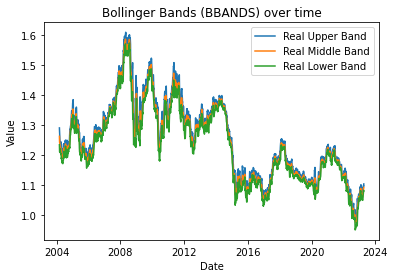

In [66]:
# Plot 'Real Upper Band', 'Real Middle Band', 'Real Lower Band' Values against Date
plt.figure(figsize=(6, 4))
plt.plot(BBANDS_eurusd3.index, BBANDS_eurusd3['Real Upper Band'], label='Real Upper Band')
plt.plot(BBANDS_eurusd3.index, BBANDS_eurusd3['Real Middle Band'], label='Real Middle Band')
plt.plot(BBANDS_eurusd3.index, BBANDS_eurusd3['Real Lower Band'], label='Real Lower Band')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Bollinger Bands (BBANDS) over time')
plt.legend()
plt.show()

In [67]:
## Concatenate columns from SMA_eurusd, EMA_eurusd, MACD_eurusd, BBANDS_eurusd dataframes
Tech_Indicators_eurusd = pd.concat([SMA_eurusd3, EMA_eurusd3, MACD_eurusd3, BBANDS_eurusd3], axis=1)

# Display the merged dataframe
Tech_Indicators_eurusd.tail()

SMA     EMA    MACD  MACD_Signal  MACD_Hist  Real Upper Band  \
Date                                                                          
2023-04-10  1.0880  1.0876  0.0063       0.0052     0.0011           1.0971   
2023-04-11  1.0886  1.0872  0.0058       0.0053     0.0005           1.0961   
2023-04-12  1.0893  1.0879  0.0057       0.0054     0.0003           1.0962   
2023-04-13  1.0909  1.0900  0.0063       0.0056     0.0007           1.0989   
2023-04-14  1.0923  1.0926  0.0071       0.0059     0.0012           1.1038   

            Real Middle Band  Real Lower Band  
Date                                           
2023-04-10            1.0880           1.0789  
2023-04-11            1.0886           1.0812  
2023-04-12            1.0893           1.0825  
2023-04-13            1.0909           1.0828  
2023-04-14            1.0923           1.0808

In [133]:
# Display info on Merged dataframe
Tech_Indicators_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4990 entries, 2004-02-26 to 2023-04-12
Freq: B
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SMA               4990 non-null   float64
 1   EMA               4990 non-null   float64
 2   MACD              4966 non-null   float64
 3   MACD_Signal       4966 non-null   float64
 4   MACD_Hist         4966 non-null   float64
 5   Real Upper Band   4990 non-null   float64
 6   Real Middle Band  4990 non-null   float64
 7   Real Lower Band   4990 non-null   float64
dtypes: float64(8)
memory usage: 350.9 KB


In [68]:
## Merge 'Close' column from 'eurusd' dataframe to 'Tech_Indicators_eurusd' dataframe
Tech_Indicators_eurusd = Tech_Indicators_eurusd.merge(eurusd[['Date', 'Close']], how='left', left_index=True, right_on='Date').set_index('Date')

# Move 'Close' column to the beginning of the dataframe
close_col = Tech_Indicators_eurusd.pop('Close')
Tech_Indicators_eurusd.insert(0, 'Close', close_col)

In [69]:
# Display the updated dataframe
Tech_Indicators_eurusd.tail()

Close     SMA     EMA    MACD  MACD_Signal  MACD_Hist  \
Date                                                                
2023-04-10    NaN  1.0880  1.0876  0.0063       0.0052     0.0011   
2023-04-11    NaN  1.0886  1.0872  0.0058       0.0053     0.0005   
2023-04-12    NaN  1.0893  1.0879  0.0057       0.0054     0.0003   
2023-04-13    NaN  1.0909  1.0900  0.0063       0.0056     0.0007   
2023-04-14    NaN  1.0923  1.0926  0.0071       0.0059     0.0012   

            Real Upper Band  Real Middle Band  Real Lower Band  
Date                                                            
2023-04-10           1.0971            1.0880           1.0789  
2023-04-11           1.0961            1.0886           1.0812  
2023-04-12           1.0962            1.0893           1.0825  
2023-04-13           1.0989            1.0909           1.0828  
2023-04-14           1.1038            1.0923           1.0808

In [70]:
Tech_Indicators_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4990 entries, 2004-03-01 to 2023-04-14
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4980 non-null   float64
 1   SMA               4990 non-null   float64
 2   EMA               4990 non-null   float64
 3   MACD              4966 non-null   float64
 4   MACD_Signal       4966 non-null   float64
 5   MACD_Hist         4966 non-null   float64
 6   Real Upper Band   4990 non-null   float64
 7   Real Middle Band  4990 non-null   float64
 8   Real Lower Band   4990 non-null   float64
dtypes: float64(9)
memory usage: 389.8 KB


In [71]:
# Drop Null values
Tech_Indicators_eurusd = Tech_Indicators_eurusd.dropna()

Tech_Indicators_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 387.2 KB


In [73]:
# Statistical Overview of Tech Indicators
Tech_Indicators_eurusd.describe()

Close          SMA          EMA         MACD  MACD_Signal  \
count  4956.000000  4956.000000  4956.000000  4956.000000  4956.000000   
mean      1.243496     1.243540     1.243547    -0.000240    -0.000251   
std       0.127388     0.126869     0.126699     0.008258     0.007811   
min       0.959200     0.976000     0.975900    -0.041000    -0.035900   
25%       1.132300     1.131400     1.131400    -0.004700    -0.004400   
50%       1.230600     1.231350     1.230900    -0.000300    -0.000100   
75%       1.336900     1.335125     1.333875     0.004800     0.004500   
max       1.598800     1.585500     1.586100     0.031200     0.027100   

         MACD_Hist  Real Upper Band  Real Middle Band  Real Lower Band  
count  4956.000000      4956.000000       4956.000000      4956.000000  
mean      0.000011         1.259424          1.243540         1.227660  
std       0.002414         0.129864          0.126869         0.124538  
min      -0.012000         0.986800          0.976000         0.950900  
25%      -0.001400         1.144775          1.131400         1.120350  
50%       0.000100         1.245150          1.231350         1.214600  
75%       0.001400         1.352625          1.335125         1.318725  
max       0.018000         1.608400          1.585500         1.572600

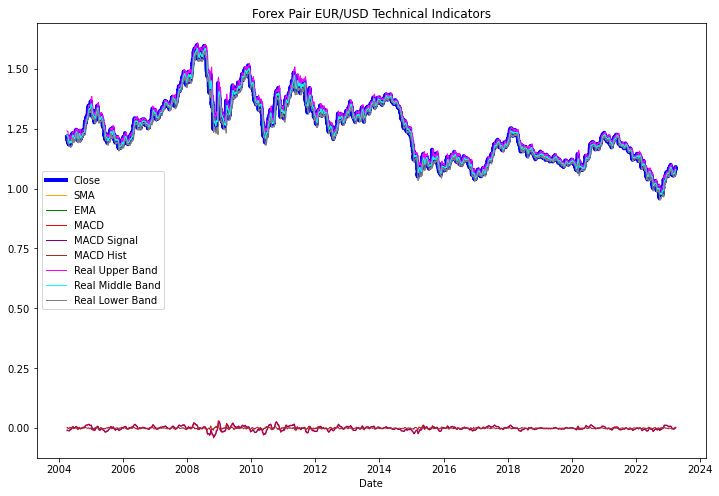

In [72]:
## Display Indicators on a graph plot

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Close price as significant display
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['Close'], label='Close', linewidth=4, color='blue')

# Plot other indicators
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['SMA'], label='SMA', linewidth=1, color='orange')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['EMA'], label='EMA', linewidth=1, color='green')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['MACD'], label='MACD', linewidth=1, color='red')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['MACD_Signal'], label='MACD Signal', linewidth=1, color='purple')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['MACD_Hist'], label='MACD Hist', linewidth=1, color='brown')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['Real Upper Band'], label='Real Upper Band', linewidth=1, color='magenta')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['Real Middle Band'], label='Real Middle Band', linewidth=1, color='cyan')
ax.plot(Tech_Indicators_eurusd.index, Tech_Indicators_eurusd['Real Lower Band'], label='Real Lower Band', linewidth=1, color='gray')

# Set x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Forex Pair EUR/USD Technical Indicators')

# Add legend
ax.legend()

# Show plot
plt.show()

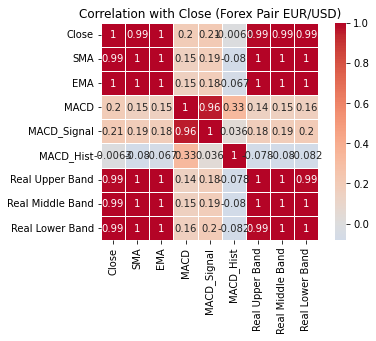

In [74]:
import seaborn as sns

## Show Correlation between variables (Price and Indicators)

# Calculate correlation matrix
corr_matrix = Tech_Indicators_eurusd.corr()

# Set 'Close' as the base for correlation plot
base_col = 'Close'

#  Plot correlation using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, cbar=True,
            linewidths=0.5, linecolor='white', annot_kws={'fontsize': 10}, square=True)

# Set title
plt.title(f'Correlation with {base_col} (Forex Pair EUR/USD)')

# Show plot
plt.show()

In [75]:
## Linear Regression Model for Technical Analysis

In [76]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [146]:
TI_eurusd = Tech_Indicators_eurusd.copy()  # Create a copy of the original DataFrame

# Drop any rows with missing values
TI_eurusd.dropna(inplace=True)

TI_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 516.2 KB


In [147]:
# Split data into features (X) and target (y)
X = TI_eurusd.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = TI_eurusd['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr_ta = lr_model.predict(X_test)

In [148]:
# Calculate MSE, RMSE, and MAE
mse_lr_ta = mean_squared_error(y_test, y_pred_lr_ta)
rmse_lr_ta = np.sqrt(mse_lr_ta)
mae_lr_ta = mean_absolute_error(y_test, y_pred_lr_ta)

print('Mean Squared Error (MSE):', mse_lr_ta)
print('Root Mean Squared Error (RMSE):', rmse_lr_ta)
print('Mean Absolute Error (MAE):', mae_lr_ta)

Mean Squared Error (MSE): 4.3343866368950845e-05
Root Mean Squared Error (RMSE): 0.006583605878920065
Mean Absolute Error (MAE): 0.005002952573122671


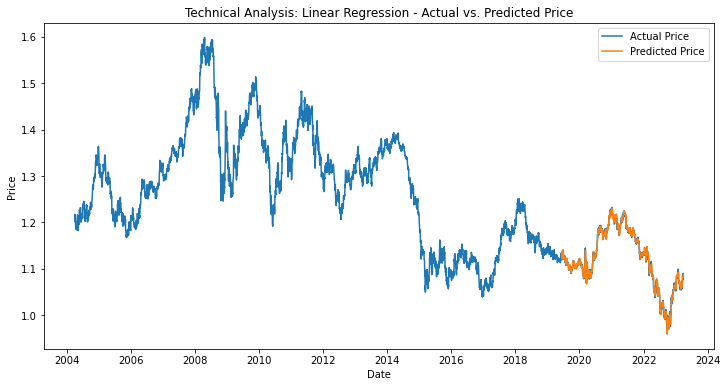

In [149]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(TI_eurusd.index, TI_eurusd['Close'], label='Actual Price')
plt.plot(y_test.index, y_pred_lr_ta, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Technical Analysis: Linear Regression - Actual vs. Predicted Price')
plt.legend()
plt.show()

In [82]:
## SVM Model for Technical Analysis

TI_eurusd = Tech_Indicators_eurusd.copy()  # Create a copy of the original DataFrame

TI_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 387.2 KB


In [83]:
# Drop any rows with missing values
TI_eurusd.dropna(inplace=True)

# Split data into features (X) and target (y)
X = TI_eurusd.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = TI_eurusd['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize SVM model
svm_model = SVR(kernel='linear')

In [84]:
# Fit the model on training data
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm_ta = svm_model.predict(X_test)

# Calculate MSE
mse_svm_ta = mean_squared_error(y_test, y_pred_svm_ta)

# Calculate RMSE
rmse_svm_ta = np.sqrt(mse_svm_ta)

# Calculate MAE
mae_svm_ta = mean_absolute_error(y_test, y_pred_svm_ta)

In [86]:
print("Mean Squared Error (MSE):", mse_svm_ta)
print("Root Mean Squared Error (RMSE):", rmse_svm_ta)
print("Mean Absolute Error (MAE):", mae_svm_ta)

Mean Squared Error (MSE): 0.0023589249258738924
Root Mean Squared Error (RMSE): 0.04856876492020249
Mean Absolute Error (MAE): 0.04671907277065191


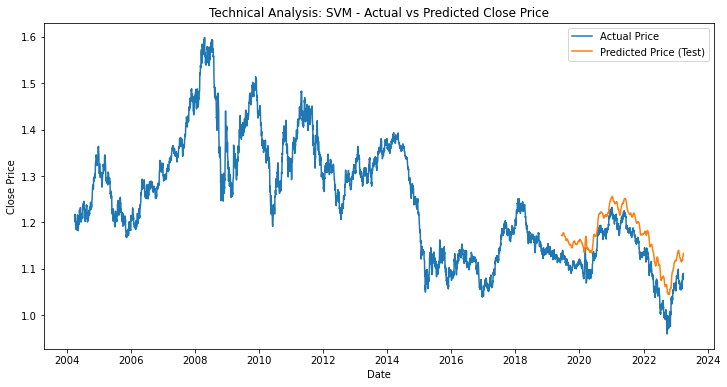

In [150]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(TI_eurusd.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_svm_ta, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical Analysis: SVM - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [89]:
## Decision Tree Regressor for Technical Analysis

In [90]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [91]:
TI_eurusd = Tech_Indicators_eurusd.copy()  # Create a copy of the original DataFrame

# Drop any rows with missing values
TI_eurusd.dropna(inplace=True)

TI_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 387.2 KB


In [92]:
# Split data into features (X) and target (y)
X = TI_eurusd.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = TI_eurusd['Close']

# Split data into train and test sets with the same indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

In [93]:
# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt_ta = dt.predict(X_test)

# Calculate MSE
mse_dt_ta = mean_squared_error(y_test, y_pred_dt_ta)

# Calculate RMSE
rmse_dt_ta = np.sqrt(mse_dt_ta)

# Calculate MAE
mae_dt_ta = mean_absolute_error(y_test, y_pred_dt_ta)

In [94]:
print("Mean Squared Error (MSE):", mse_dt_ta)
print("Root Mean Squared Error (RMSE):", rmse_dt_ta)
print("Mean Absolute Error (MAE):", mae_dt_ta)

Mean Squared Error (MSE): 0.0004779125604838696
Root Mean Squared Error (RMSE): 0.021861211322428353
Mean Absolute Error (MAE): 0.015108064516129015


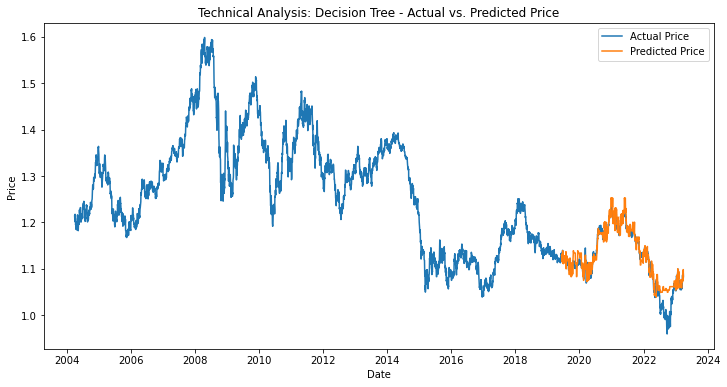

In [151]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(TI_eurusd.index, TI_eurusd['Close'], label='Actual Price')
plt.plot(y_test.index, y_pred_dt_ta, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Technical Analysis: Decision Tree - Actual vs. Predicted Price')
plt.legend()
plt.show()

In [97]:
## Gradient Boosting Model for Technical Analysis

In [98]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [99]:
TI_eurusd = Tech_Indicators_eurusd.copy()  # Create a copy of the original DataFrame

# Drop any rows with missing values
TI_eurusd.dropna(inplace=True)

TI_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 387.2 KB


In [101]:
# Split data into features (X) and target (y)
X = TI_eurusd.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = TI_eurusd['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb_ta = gb_model.predict(X_test)

In [103]:
# Calculate MSE, RMSE, and MAE
mse_gb_ta = mean_squared_error(y_test, y_pred_gb_ta)
rmse_gb_ta = np.sqrt(mse_gb_ta)
mae_gb_ta = mean_absolute_error(y_test, y_pred_gb_ta)

print('Mean Squared Error (MSE):', mse_gb_ta)
print('Root Mean Squared Error (RMSE):', rmse_gb_ta)
print('Mean Absolute Error (MAE):', mae_gb_ta)

Mean Squared Error (MSE): 0.0003654371195228497
Root Mean Squared Error (RMSE): 0.019116409692273538
Mean Absolute Error (MAE): 0.010364811081842453


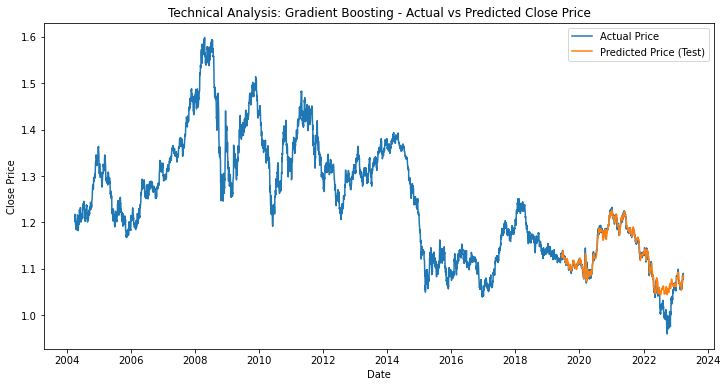

In [152]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(TI_eurusd.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_gb_ta, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical Analysis: Gradient Boosting - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [109]:
from tabulate import tabulate
from termcolor import colored


# Create a dictionary to store the model names and their respective metrics
models = {'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
          'MSE': [mse_lr_ta, mse_svm_ta, mse_dt_ta, mse_gb_ta],
          'RMSE': [rmse_lr_ta, rmse_svm_ta, rmse_dt_ta, rmse_gb_ta],
          'MAE': [mae_lr_ta, mae_svm_ta, mae_dt_ta, mae_gb_ta]}

# Create a pandas DataFrame from the dictionary
metrics_ta = pd.DataFrame(models)

# Update the index to start from 1
metrics_ta.index = range(1, len(metrics_df)+1)

# Convert the DataFrame to tabulate format
table = tabulate(metrics_ta, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Technical Analysis', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the table
print(table)

                           Technical Analysis                          
╒════╤════════════════════════╤═════════════╤════════════╤════════════╕
│    │ Model                  │         MSE │       RMSE │        MAE │
╞════╪════════════════════════╪═════════════╪════════════╪════════════╡
│ 1  │ Linear Regression      │ 4.33439e-05 │ 0.00658361 │ 0.00500295 │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 2  │ Support Vector Machine │ 0.00235892  │ 0.0485688  │ 0.0467191  │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 3  │ Decision Tree          │ 0.000477913 │ 0.0218612  │ 0.0151081  │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 4  │ Gradient Boosting      │ 0.000365437 │ 0.0191164  │ 0.0103648  │
╘════╧════════════════════════╧═════════════╧════════════╧════════════╛


In [247]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [110]:
## Sentiment Real-time News Analysis

In [111]:
# Import Libraries
import datetime
import time
from datetime import timedelta
import requests
import pandas as pd
import json

In [270]:
currency = 'EUR'
apiKey = 'SV02437N7RQ8QT02'
limit = '200'  # 200 is max limit
number_of_months = 12   # Set approximaltely how many months of data you want (Starting from the date you choose below)

startYear = 2022  # Change with start year     example: 2020
startMonth = 3  # Change with start month   example: 4
startDay = 1  # Change with start day    example: 17

In [674]:
# Logic (Do not modify unless necessary)

startDate = datetime.datetime(startYear, startMonth, startDay)
startDate2 = startDate + timedelta(days= 4)

year = f'{startDate.year}' 
if startDate.month < 10: 
    month = f'0{startDate.month}'
else:
    month = f'{startDate.month}'
if startDate.day < 10: 
    day = f'0{startDate.day}'
else:
    day = f'{startDate.day}'


year2 = f'{startDate2.year}' 
if startDate2.month < 10: 
    month2 = f'0{startDate2.month}'
else:
    month2 = f'{startDate2.month}'
if startDate2.day < 10: 
    day2 = f'0{startDate2.day}'
else:
    day2 = f'{startDate2.day}'

hour = '00'
minute = '00'

date_from = f'{year}{month}{day}T{hour}{minute}'

date_to = f'{year2}{month2}{day2}T{hour}{minute}'

tryExcept = False

In [675]:
# Sentiment Analysis data retriever

for i in range (6 * number_of_months):
    if i == 0:
        url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=FOREX:{currency}&time_from={date_from}&time_to={date_to}&sort=EARLIEST&limit={limit}&apikey={apiKey}'

        r = requests.get(url)
        data = r.json()

        df2 = pd.json_normalize(data['feed']) 

        df2.to_csv(f"{currency}sentimentaldata.csv", index=False)

    else:
        startDate2 = startDate + timedelta(days= 4)

        year = f'{startDate.year}' 
        if startDate.month < 10: 
            month = f'0{startDate.month}'
        else:
            month = f'{startDate.month}'
        if startDate.day < 10: 
            day = f'0{startDate.day}'
        else:
            day = f'{startDate.day}'


        year2 = f'{startDate2.year}' 
        if startDate2.month < 10: 
            month2 = f'0{startDate2.month}'
        else:
            month2 = f'{startDate2.month}'
        if startDate2.day < 10: 
            day2 = f'0{startDate2.day}'
        else:
            day2 = f'{startDate2.day}'


        date_from = f'{year}{month}{day}T{hour}{minute}'

        date_to = f'{year2}{month2}{day2}T{hour}{minute}'

        while tryExcept == False:
            try:
                url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=FOREX:{currency}&time_from={date_from}&time_to={date_to}&sort=EARLIEST&limit={limit}&apikey={apiKey}'

                r = requests.get(url)
                data = r.json()

                df2 = pd.json_normalize(data['feed']) 
                tryExcept = True
            except:
                print("Error occurred. Trying to continue...")
                time.sleep(5)


        df2.to_csv(f"{currency}sentimentaldata.csv", mode='a', index=False, header=False)
    
    startDate = startDate2
    startDate = startDate + timedelta(days= 1)
    tryExcept = False
    time.sleep(5)

Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurred. Trying to continue...
Error occurr

In [112]:
# Import News Sentimental Data

In [113]:
EURUSD_Sent_Data = pd.read_csv('EURUSD_Sent_Data.csv')
print(EURUSD_Sent_Data.shape)
print(EURUSD_Sent_Data.dtypes)
EURUSD_Sent_Data.head(5)

(94648, 2)
Date                object
ticker_sentiment    object
dtype: object


Date                                   ticker_sentiment
0  2023-04-04  {'ticker': 'GS', 'relevance_score': '0.073546'...
1  2023-04-04  {'ticker': 'FOREX:UYU', 'relevance_score': '0....
2  2023-04-04  {'ticker': 'WFC', 'relevance_score': '0.078354...
3  2023-04-04  {'ticker': 'USAU', 'relevance_score': '0.14256...
4  2023-04-04  {'ticker': 'APG', 'relevance_score': '0.042647...

In [114]:
# Changing datatypes of 'Date' to datetime
EURUSD_Sent_Data[['Date']] = EURUSD_Sent_Data[['Date']].astype('datetime64')

# Separate the SMA values and Concat within Dataframe
EURUSD_Sent_Data2 = pd.concat([EURUSD_Sent_Data[['Date','ticker_sentiment']],pd.json_normalize(EURUSD_Sent_Data['ticker_sentiment']) ],axis=1)

# Quick overlook on the uploaded dataset
EURUSD_Sent_Data2.head()

Date                                   ticker_sentiment
0 2023-04-04  {'ticker': 'GS', 'relevance_score': '0.073546'...
1 2023-04-04  {'ticker': 'FOREX:UYU', 'relevance_score': '0....
2 2023-04-04  {'ticker': 'WFC', 'relevance_score': '0.078354...
3 2023-04-04  {'ticker': 'USAU', 'relevance_score': '0.14256...
4 2023-04-04  {'ticker': 'APG', 'relevance_score': '0.042647...

In [115]:
# Import library to split JSON values from 'p_attributes' column
from ast import literal_eval

In [116]:
EURUSD_Sent_Data2['ticker_sentiment'] = EURUSD_Sent_Data2['ticker_sentiment'].apply(literal_eval)

In [117]:
pd.json_normalize(EURUSD_Sent_Data2['ticker_sentiment'])

ticker relevance_score ticker_sentiment_score ticker_sentiment_label
0             GS        0.073546              -0.092226                Neutral
1      FOREX:UYU        0.140076              -0.107323                Neutral
2            WFC        0.078354              -0.064324                Neutral
3           USAU        0.142565               0.117043                Neutral
4            APG        0.042647               0.223831       Somewhat-Bullish
...          ...             ...                    ...                    ...
94643       AMZN        0.060833              -0.101763                Neutral
94644          V        0.041886              -0.294962       Somewhat-Bearish
94645  FOREX:RUB        0.151311              -0.438023                Bearish
94646  FOREX:USD        0.041886              -0.171861       Somewhat-Bearish
94647  FOREX:USD        0.121312              -0.544853                Bearish

[94648 rows x 4 columns]

In [118]:
# Separate the EUR/USD ticker_sentiment values and Concat within Dataframe
EURUSD_Sent_Data2 = pd.concat([EURUSD_Sent_Data2[['Date','ticker_sentiment']],pd.json_normalize(EURUSD_Sent_Data2['ticker_sentiment']) ],axis=1)

In [119]:
print(EURUSD_Sent_Data2.shape)
print(EURUSD_Sent_Data2.dtypes)
EURUSD_Sent_Data2.head(5)

(94648, 6)
Date                      datetime64[ns]
ticker_sentiment                  object
ticker                            object
relevance_score                   object
ticker_sentiment_score            object
ticker_sentiment_label            object
dtype: object


Date                                   ticker_sentiment     ticker  \
0 2023-04-04  {'ticker': 'GS', 'relevance_score': '0.073546'...         GS   
1 2023-04-04  {'ticker': 'FOREX:UYU', 'relevance_score': '0....  FOREX:UYU   
2 2023-04-04  {'ticker': 'WFC', 'relevance_score': '0.078354...        WFC   
3 2023-04-04  {'ticker': 'USAU', 'relevance_score': '0.14256...       USAU   
4 2023-04-04  {'ticker': 'APG', 'relevance_score': '0.042647...        APG   

  relevance_score ticker_sentiment_score ticker_sentiment_label  
0        0.073546              -0.092226                Neutral  
1        0.140076              -0.107323                Neutral  
2        0.078354              -0.064324                Neutral  
3        0.142565               0.117043                Neutral  
4        0.042647               0.223831       Somewhat-Bullish

In [120]:
# Display name and count of all unique values with 'colour' column
EURUSD_Sent_Data2['ticker'].value_counts()

FOREX:USD     19184
FOREX:EUR     13150
FOREX:JPY      5502
FOREX:GBP      2996
CRYPTO:BTC     2499
              ...  
CRKN              1
KAI               1
PBI               1
RRGB              1
BBRYF             1
Name: ticker, Length: 3489, dtype: int64

In [121]:
EURUSD_Sent_Data2 = EURUSD_Sent_Data2[(EURUSD_Sent_Data2['ticker'] == 'FOREX:EUR') | (EURUSD_Sent_Data2['ticker'] == 'FOREX:USD')]

In [122]:
# Display name and count of all unique values with 'colour' column
EURUSD_Sent_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32334 entries, 5 to 94647
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    32334 non-null  datetime64[ns]
 1   ticker_sentiment        32334 non-null  object        
 2   ticker                  32334 non-null  object        
 3   relevance_score         32334 non-null  object        
 4   ticker_sentiment_score  32334 non-null  object        
 5   ticker_sentiment_label  32334 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.7+ MB


In [123]:
# Calculate the length of values in "ticker_sentiment_score" column
EURUSD_Sent_Data2['ticker_sentiment_score_length'] = EURUSD_Sent_Data2['ticker_sentiment_score'].str.len()

# Display the updated DataFrame with the new column
EURUSD_Sent_Data2.head()

Date                                   ticker_sentiment     ticker  \
5  2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
10 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
11 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
13 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
15 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   

   relevance_score ticker_sentiment_score ticker_sentiment_label  \
5         0.306963              -0.114081                Neutral   
10        0.096283               0.116275                Neutral   
11        0.066784               0.165273       Somewhat-Bullish   
13        0.056275              -0.228093       Somewhat-Bearish   
15        0.851762              -0.433203                Bearish   

    ticker_sentiment_score_length  
5                               9  
10                              8  
11                              8  
13                              9  
15                              9

In [124]:
# Display name and count of all unique values with 'colour' column
EURUSD_Sent_Data2['ticker_sentiment_score_length'].value_counts()

9    15192
8    13427
3     2136
7     1322
6      165
5       84
4        8
Name: ticker_sentiment_score_length, dtype: int64

In [125]:
# Convert "ticker_sentiment_score" column to numeric data type and store in "ticker_sentiment_score2"
EURUSD_Sent_Data2['ticker_sentiment_score2'] = pd.to_numeric(EURUSD_Sent_Data2['ticker_sentiment_score'], errors='coerce')

In [126]:
dfexp = EURUSD_Sent_Data2.groupby(['Date'])['ticker_sentiment_score2'].mean()

In [127]:
dfexp.head()

Date
2022-03-01   -0.178843
2022-03-02   -0.213819
2022-03-03   -0.176324
2022-03-04   -0.273566
2022-03-05   -0.413952
Name: ticker_sentiment_score2, dtype: float64

In [128]:
# Join "dfexp" to "EURUSD_Sent_Data2" by "Date"
EURUSD_Sent_Data2 = EURUSD_Sent_Data2.join(dfexp, on='Date', rsuffix='_mean')

In [129]:
EURUSD_Sent_Data2.head()

Date                                   ticker_sentiment     ticker  \
5  2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
10 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
11 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
13 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   
15 2023-04-04  {'ticker': 'FOREX:USD', 'relevance_score': '0....  FOREX:USD   

   relevance_score ticker_sentiment_score ticker_sentiment_label  \
5         0.306963              -0.114081                Neutral   
10        0.096283               0.116275                Neutral   
11        0.066784               0.165273       Somewhat-Bullish   
13        0.056275              -0.228093       Somewhat-Bearish   
15        0.851762              -0.433203                Bearish   

    ticker_sentiment_score_length  ticker_sentiment_score2  \
5                               9                -0.114081   
10                              8                 0.116275   
11                              8                 0.165273   
13                              9                -0.228093   
15                              9                -0.433203   

    ticker_sentiment_score2_mean  
5                       0.008778  
10                      0.008778  
11                      0.008778  
13                      0.008778  
15                      0.008778

In [130]:
# Display name and count of all unique values with 'colour' column
EURUSD_Sent_Data2['ticker_sentiment_score2_mean'].value_counts()

-0.021221    340
-0.012391    304
-0.075377    282
 0.021075    277
 0.042648    275
            ... 
-0.192252      2
-0.031230      1
 0.080248      1
-0.756984      1
 0.029009      1
Name: ticker_sentiment_score2_mean, Length: 329, dtype: int64

In [131]:
EURUSD_Sent_Data2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32334 entries, 5 to 94647
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           32334 non-null  datetime64[ns]
 1   ticker_sentiment               32334 non-null  object        
 2   ticker                         32334 non-null  object        
 3   relevance_score                32334 non-null  object        
 4   ticker_sentiment_score         32334 non-null  object        
 5   ticker_sentiment_label         32334 non-null  object        
 6   ticker_sentiment_score_length  32334 non-null  int64         
 7   ticker_sentiment_score2        32334 non-null  float64       
 8   ticker_sentiment_score2_mean   32334 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [132]:
TI_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-04-02 to 2023-03-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             4956 non-null   float64
 1   SMA               4956 non-null   float64
 2   EMA               4956 non-null   float64
 3   MACD              4956 non-null   float64
 4   MACD_Signal       4956 non-null   float64
 5   MACD_Hist         4956 non-null   float64
 6   Real Upper Band   4956 non-null   float64
 7   Real Middle Band  4956 non-null   float64
 8   Real Lower Band   4956 non-null   float64
dtypes: float64(9)
memory usage: 387.2 KB


In [133]:

# Create a copy of TI_eurusd DataFrame
EURUSD_SentA = TI_eurusd.copy()

# Join "ticker_sentiment_score2_mean" column from EURUSD_Sent_Data2 to EURUSD_SentA DataFrame using Date as the common key
EURUSD_SentA = EURUSD_SentA.join(EURUSD_Sent_Data2.set_index("Date")["ticker_sentiment_score2_mean"])

# Drop any NaN values in EURUSD_SentA DataFrame
EURUSD_SentA.dropna(inplace=True)

# Display the resulting DataFrame EURUSD_SentA
EURUSD_SentA.head()

Close     SMA     EMA    MACD  MACD_Signal  MACD_Hist  \
Date                                                                 
2022-03-01  1.1126  1.1288  1.1265 -0.0031       -0.001    -0.0021   
2022-03-01  1.1126  1.1288  1.1265 -0.0031       -0.001    -0.0021   
2022-03-01  1.1126  1.1288  1.1265 -0.0031       -0.001    -0.0021   
2022-03-01  1.1126  1.1288  1.1265 -0.0031       -0.001    -0.0021   
2022-03-01  1.1126  1.1288  1.1265 -0.0031       -0.001    -0.0021   

            Real Upper Band  Real Middle Band  Real Lower Band  \
Date                                                             
2022-03-01           1.1443            1.1288           1.1132   
2022-03-01           1.1443            1.1288           1.1132   
2022-03-01           1.1443            1.1288           1.1132   
2022-03-01           1.1443            1.1288           1.1132   
2022-03-01           1.1443            1.1288           1.1132   

            ticker_sentiment_score2_mean  
Date                                      
2022-03-01                     -0.178843  
2022-03-01                     -0.178843  
2022-03-01                     -0.178843  
2022-03-01                     -0.178843  
2022-03-01                     -0.178843

In [134]:
# Drop the specified columns from EURUSD_SentA DataFrame
EURUSD_SentA.drop(columns=["SMA", "EMA", "MACD", "MACD_Signal", "MACD_Hist", "Real Upper Band", "Real Middle Band", "Real Lower Band"], inplace=True)

# Display the resulting DataFrame EURUSD_SentA
EURUSD_SentA.head()

Close  ticker_sentiment_score2_mean
Date                                            
2022-03-01  1.1126                     -0.178843
2022-03-01  1.1126                     -0.178843
2022-03-01  1.1126                     -0.178843
2022-03-01  1.1126                     -0.178843
2022-03-01  1.1126                     -0.178843

In [135]:
# Remove duplicates based on index value (datetime)
EURUSD_SentA = EURUSD_SentA.loc[~EURUSD_SentA.index.duplicated(keep='first')]

# Display the resulting DataFrame EURUSD_SentA
EURUSD_SentA.head()

Close  ticker_sentiment_score2_mean
Date                                            
2022-03-01  1.1126                     -0.178843
2022-03-02  1.1121                     -0.213819
2022-03-03  1.1064                     -0.176324
2022-03-04  1.0926                     -0.273566
2022-03-07  1.0852                     -0.126892

In [136]:
# Sort index in descending order (latest to oldest)
EURUSD_SentA = EURUSD_SentA.sort_index(ascending=False)

# Display the resulting DataFrame EURUSD_SentA
EURUSD_SentA.head()

Close  ticker_sentiment_score2_mean
Date                                            
2023-03-31  1.0842                     -0.000608
2023-03-30  1.0901                      0.024623
2023-03-29  1.0843                      0.042573
2023-03-28  1.0843                     -0.001646
2023-03-27  1.0796                      0.025596

In [137]:
EURUSD_SentA.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2023-03-31 to 2022-03-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [138]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

In [139]:
## Linear Regression Model for Sentimental Analysis

In [140]:
EURUSD_SentA2 = EURUSD_SentA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_SentA2 = EURUSD_SentA2.sort_index(ascending=True)

EURUSD_SentA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [141]:
# Drop any rows with missing values
EURUSD_SentA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_SentA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_SentA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr_model = LinearRegression()

In [142]:
# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr_sa = lr_model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse_lr_sa = mean_squared_error(y_test, y_pred_lr_sa)
rmse_lr_sa = np.sqrt(mse_lr_sa)
mae_lr_sa = mean_absolute_error(y_test, y_pred_lr_sa)

In [143]:
print("Mean Squared Error (MSE):", mse_lr_sa)
print("Root Mean Squared Error (RMSE):", rmse_lr_sa)
print("Mean Absolute Error (MAE):", mae_lr_sa)

Mean Squared Error (MSE): 0.0023142274740394777
Root Mean Squared Error (RMSE): 0.04810641822085154
Mean Absolute Error (MAE): 0.04696691628358357


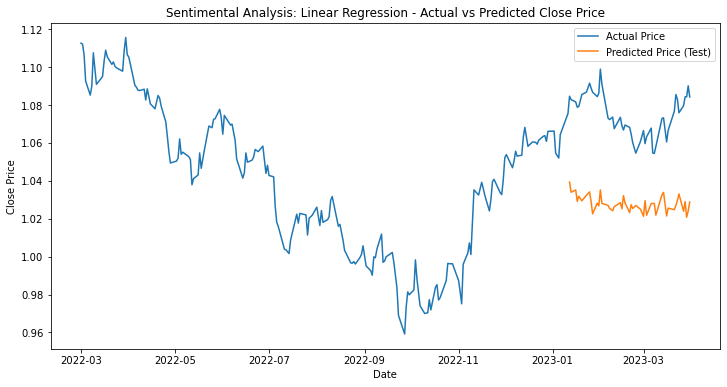

In [144]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_lr_sa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sentimental Analysis: Linear Regression - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [153]:
## SVM Model for Sentimental Analysis

EURUSD_SentA2 = EURUSD_SentA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_SentA2 = EURUSD_SentA2.sort_index(ascending=True)

EURUSD_SentA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [154]:
# Drop any rows with missing values
EURUSD_SentA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_SentA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_SentA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize SVM model
svm_model = SVR(kernel='linear')

In [155]:
# Fit the model on training data
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm_sa = svm_model.predict(X_test)

# Calculate MSE
mse_svm_sa = mean_squared_error(y_test, y_pred_svm_sa)

# Calculate RMSE
rmse_svm_sa = np.sqrt(mse_svm_sa)

# Calculate MAE
mae_svm_sa = mean_absolute_error(y_test, y_pred_svm_sa)

In [156]:
print("Mean Squared Error (MSE):", mse_svm_sa)
print("Root Mean Squared Error (RMSE):", rmse_svm_sa)
print("Mean Absolute Error (MAE):", mae_svm_sa)

Mean Squared Error (MSE): 0.0015335891489361784
Root Mean Squared Error (RMSE): 0.03916106674921124
Mean Absolute Error (MAE): 0.037517021276595855


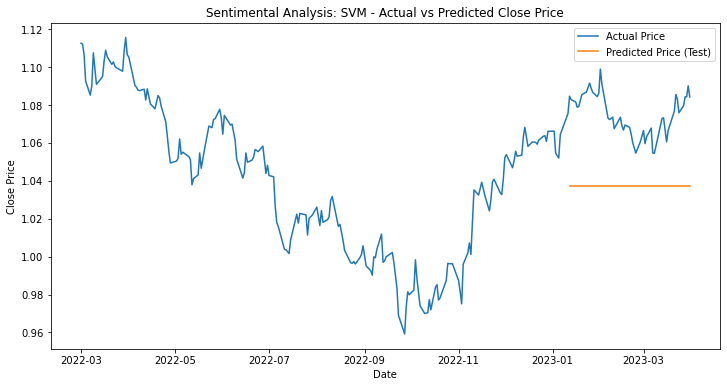

In [157]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_svm_sa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sentimental Analysis: SVM - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [158]:
## Decision Tree Regressor for Sentimental Analysis

EURUSD_SentA2 = EURUSD_SentA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_SentA2 = EURUSD_SentA2.sort_index(ascending=True)

EURUSD_SentA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [159]:
# Drop any rows with missing values
EURUSD_SentA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_SentA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_SentA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

In [160]:
# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt_sa = dt.predict(X_test)

# Calculate MSE
mse_dt_sa = mean_squared_error(y_test, y_pred_dt_sa)

# Calculate RMSE
rmse_dt_sa = np.sqrt(mse_dt_sa)

# Calculate MAE
mae_dt_sa = mean_absolute_error(y_test, y_pred_dt_sa)

In [161]:
print("Mean Squared Error (MSE):", mse_dt_sa)
print("Root Mean Squared Error (RMSE):", rmse_dt_sa)
print("Mean Absolute Error (MAE):", mae_dt_sa)

Mean Squared Error (MSE): 0.003953962978723403
Root Mean Squared Error (RMSE): 0.06288054531191188
Mean Absolute Error (MAE): 0.05577446808510635


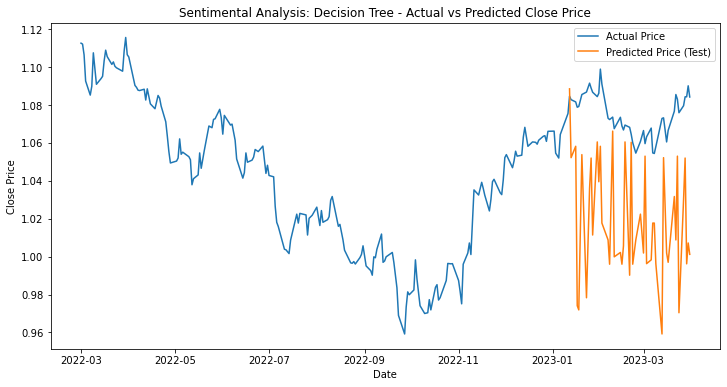

In [162]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_dt_sa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sentimental Analysis: Decision Tree - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [163]:
## Gradient Boosting Model for Sentimental Analysis

In [164]:
EURUSD_SentA2 = EURUSD_SentA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_SentA2 = EURUSD_SentA2.sort_index(ascending=True)

EURUSD_SentA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [165]:
# Drop any rows with missing values
EURUSD_SentA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_SentA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_SentA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

In [166]:
# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb_sa = gb_model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse_gb_sa = mean_squared_error(y_test, y_pred_gb_sa)
rmse_gb_sa = np.sqrt(mse_gb_sa)
mae_gb_sa = mean_absolute_error(y_test, y_pred_gb_sa)

In [167]:
print("Mean Squared Error (MSE):", mse_gb_sa)
print("Root Mean Squared Error (RMSE):", rmse_gb_sa)
print("Mean Absolute Error (MAE):", mae_gb_sa)

Mean Squared Error (MSE): 0.003497629507791038
Root Mean Squared Error (RMSE): 0.05914076012185706
Mean Absolute Error (MAE): 0.056174959184338874


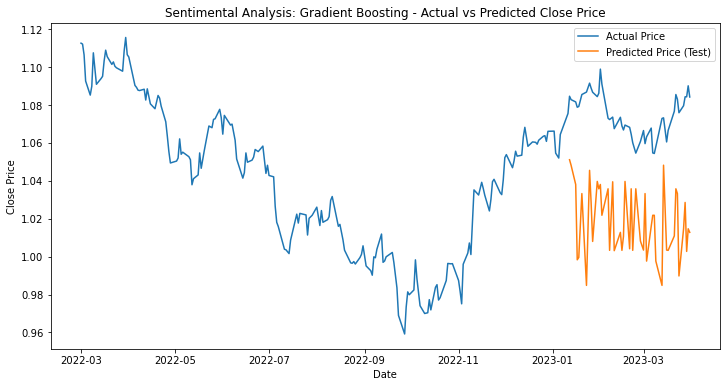

In [168]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_gb_sa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sentimental Analysis: Gradient Boosting - Actual vs Predicted Close Price')
plt.legend()
plt.show()

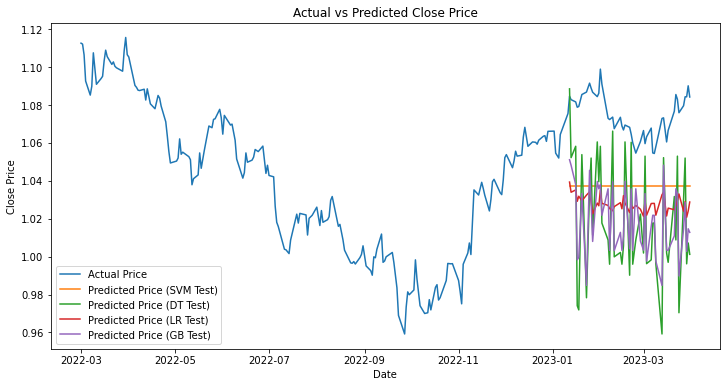

In [169]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_svm_sa, label='Predicted Price (SVM Test)')
plt.plot(X_test.index, y_pred_dt_sa, label='Predicted Price (DT Test)')
plt.plot(X_test.index, y_pred_lr_sa, label='Predicted Price (LR Test)')
plt.plot(X_test.index, y_pred_gb_sa, label='Predicted Price (GB Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [172]:
from tabulate import tabulate

# Create a dictionary to store the model names and their respective metrics
models = {'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
          'MSE': [mse_lr_sa, mse_svm_sa, mse_dt_sa, mse_gb_sa],
          'RMSE': [rmse_lr_sa, rmse_svm_sa, rmse_dt_sa, rmse_gb_sa],
          'MAE': [mae_lr_sa, mae_svm_sa, mae_dt_sa, mae_gb_sa]}

# Create a pandas DataFrame from the dictionary
metrics_sa = pd.DataFrame(models)

# Create a pandas DataFrame from the dictionary
metrics_sa = pd.DataFrame(models)

# Update the index to start from 1
metrics_sa.index = range(1, len(metrics_sa)+1)

# Convert the DataFrame to tabulate format
table = tabulate(metrics_sa, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Sentimental Analysis', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the table
print(table)

                        Sentimental Analysis                        
╒════╤════════════════════════╤════════════╤═══════════╤═══════════╕
│    │ Model                  │        MSE │      RMSE │       MAE │
╞════╪════════════════════════╪════════════╪═══════════╪═══════════╡
│ 1  │ Linear Regression      │ 0.00231423 │ 0.0481064 │ 0.0469669 │
├────┼────────────────────────┼────────────┼───────────┼───────────┤
│ 2  │ Support Vector Machine │ 0.00153359 │ 0.0391611 │ 0.037517  │
├────┼────────────────────────┼────────────┼───────────┼───────────┤
│ 3  │ Decision Tree          │ 0.00395396 │ 0.0628805 │ 0.0557745 │
├────┼────────────────────────┼────────────┼───────────┼───────────┤
│ 4  │ Gradient Boosting      │ 0.00349763 │ 0.0591408 │ 0.056175  │
╘════╧════════════════════════╧════════════╧═══════════╧═══════════╛


In [173]:
## Combining Technical Indicators and Sentimental Score (Technical & Sentimental Analysis)

In [174]:
# Create a copy of TI_eurusd DataFrame
EURUSD_TSA = TI_eurusd.copy()

# Join "ticker_sentiment_score2_mean" column from EURUSD_Sent_Data2 to EURUSD_SentA DataFrame using Date as the common key
EURUSD_TSA = EURUSD_TSA.join(EURUSD_Sent_Data2.set_index("Date")["ticker_sentiment_score2_mean"])

# Drop any NaN values in EURUSD_SentA DataFrame
EURUSD_TSA.dropna(inplace=True)

# Drop duplicates from EURUSD_TSA DataFrame
EURUSD_TSA.drop_duplicates(inplace=True)

# Show shape of EURUSD_TSA DataFrame
print(EURUSD_TSA.shape)

# Display the resulting DataFrame EURUSD_SentA
EURUSD_TSA.info()
EURUSD_TSA.head()

(233, 10)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


Close     SMA     EMA    MACD  MACD_Signal  MACD_Hist  \
Date                                                                 
2022-03-01  1.1126  1.1288  1.1265 -0.0031      -0.0010    -0.0021   
2022-03-02  1.1121  1.1264  1.1239 -0.0041      -0.0016    -0.0025   
2022-03-03  1.1064  1.1239  1.1217 -0.0048      -0.0022    -0.0026   
2022-03-04  1.0926  1.1210  1.1190 -0.0058      -0.0029    -0.0029   
2022-03-07  1.0852  1.1170  1.1141 -0.0076      -0.0039    -0.0037   

            Real Upper Band  Real Middle Band  Real Lower Band  \
Date                                                             
2022-03-01           1.1443            1.1288           1.1132   
2022-03-02           1.1440            1.1264           1.1088   
2022-03-03           1.1418            1.1239           1.1060   
2022-03-04           1.1396            1.1210           1.1023   
2022-03-07           1.1408            1.1170           1.0932   

            ticker_sentiment_score2_mean  
Date                                      
2022-03-01                     -0.178843  
2022-03-02                     -0.213819  
2022-03-03                     -0.176324  
2022-03-04                     -0.273566  
2022-03-07                     -0.126892

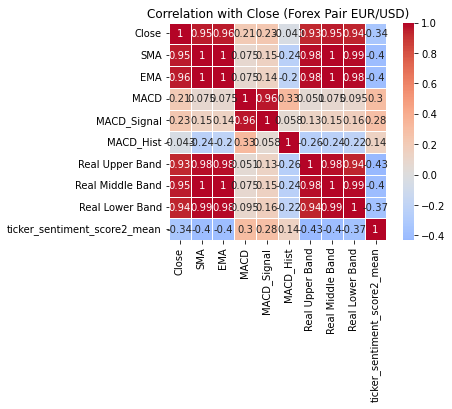

In [175]:
## Show Correlation between variables (Price and Indicators)

# Calculate correlation matrix
corr_matrix = EURUSD_TSA.corr()

# Set 'Close' as the base for correlation plot
base_col = 'Close'

#  Plot correlation using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, cbar=True,
            linewidths=0.5, linecolor='white', annot_kws={'fontsize': 10}, square=True)

# Set title
plt.title(f'Correlation with {base_col} (Forex Pair EUR/USD)')

# Show plot
plt.show()

In [177]:
## Linear Regression Model for Technical & Sentimental Analysis

In [178]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [179]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr_model = LinearRegression()

In [180]:
# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr_tsa = lr_model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse_lr_tsa = mean_squared_error(y_test, y_pred_lr_tsa)
rmse_lr_tsa = np.sqrt(mse_lr_tsa)
mae_lr_tsa = mean_absolute_error(y_test, y_pred_lr_tsa)

In [181]:
print("Mean Squared Error (MSE):", mse_lr_tsa)
print("Root Mean Squared Error (RMSE):", rmse_lr_tsa)
print("Mean Absolute Error (MAE):", mae_lr_tsa)

Mean Squared Error (MSE): 4.465568830900228e-05
Root Mean Squared Error (RMSE): 0.006682491175377808
Mean Absolute Error (MAE): 0.0052842561560526346


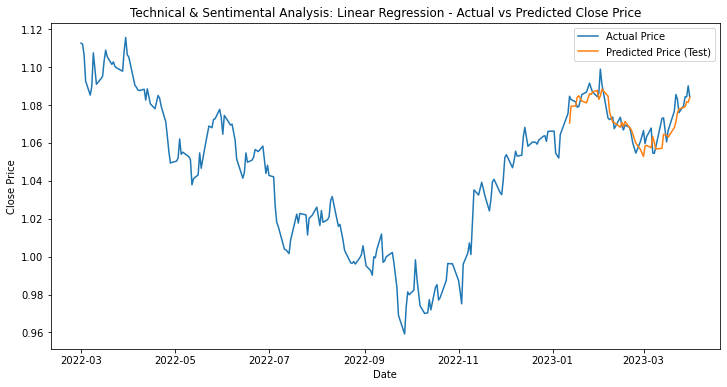

In [182]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_lr_tsa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical & Sentimental Analysis: Linear Regression - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [184]:
## SVM Model for Technical & Sentimental Analysis

EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [185]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize SVM model
svm_model = SVR(kernel='linear')

In [186]:
# Fit the model on training data
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm_tsa = svm_model.predict(X_test)

# Calculate MSE
mse_svm_tsa = mean_squared_error(y_test, y_pred_svm_tsa)

# Calculate RMSE
rmse_svm_tsa = np.sqrt(mse_svm_tsa)

# Calculate MAE
mae_svm_tsa = mean_absolute_error(y_test, y_pred_svm_tsa)

In [187]:
print("Mean Squared Error (MSE):", mse_svm_tsa)
print("Root Mean Squared Error (RMSE):", rmse_svm_tsa)
print("Mean Absolute Error (MAE):", mae_svm_tsa)

Mean Squared Error (MSE): 0.0015335891489361784
Root Mean Squared Error (RMSE): 0.03916106674921124
Mean Absolute Error (MAE): 0.037517021276595855


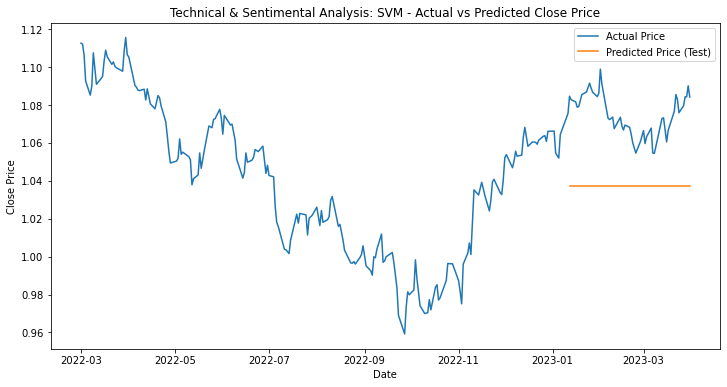

In [188]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_svm_tsa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical & Sentimental Analysis: SVM - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [189]:
## Decision Tree Regressor for Technical & Sentimental Analysis

EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [190]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

In [191]:
# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt_tsa = dt.predict(X_test)

# Calculate MSE
mse_dt_tsa = mean_squared_error(y_test, y_pred_dt_tsa)

# Calculate RMSE
rmse_dt_tsa = np.sqrt(mse_dt_tsa)

# Calculate MAE
mae_dt_tsa = mean_absolute_error(y_test, y_pred_dt_tsa)

In [192]:
print("Mean Squared Error (MSE):", mse_dt_tsa)
print("Root Mean Squared Error (RMSE):", rmse_dt_tsa)
print("Mean Absolute Error (MAE):", mae_dt_tsa)

Mean Squared Error (MSE): 0.0001941206382978725
Root Mean Squared Error (RMSE): 0.013932718266651073
Mean Absolute Error (MAE): 0.011882978723404275


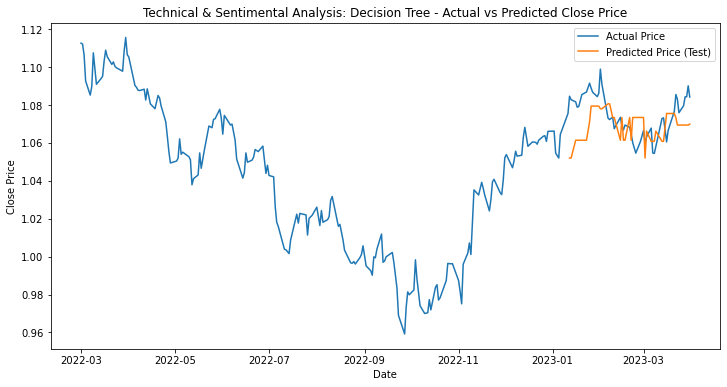

In [193]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_dt_tsa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical & Sentimental Analysis: Decision Tree - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [194]:
## Gradient Boosting Model for Technical & Sentimental Analysis

In [195]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [196]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

In [197]:
# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb_tsa = gb_model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse_gb_tsa = mean_squared_error(y_test, y_pred_gb_tsa)
rmse_gb_tsa = np.sqrt(mse_gb_tsa)
mae_gb_tsa = mean_absolute_error(y_test, y_pred_gb_tsa)

In [198]:
print("Mean Squared Error (MSE):", mse_gb_tsa)
print("Root Mean Squared Error (RMSE):", rmse_gb_tsa)
print("Mean Absolute Error (MAE):", mae_gb_tsa)

Mean Squared Error (MSE): 0.00013452881172339637
Root Mean Squared Error (RMSE): 0.01159865559982692
Mean Absolute Error (MAE): 0.00942956058989115


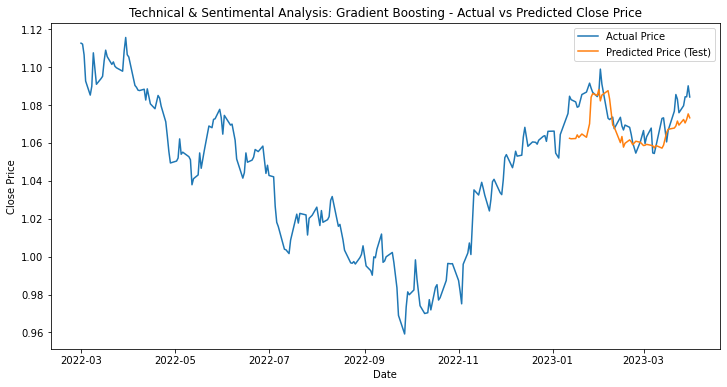

In [199]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_gb_tsa, label='Predicted Price (Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical & Sentimental Analysis: Gradient Boosting - Actual vs Predicted Close Price')
plt.legend()
plt.show()

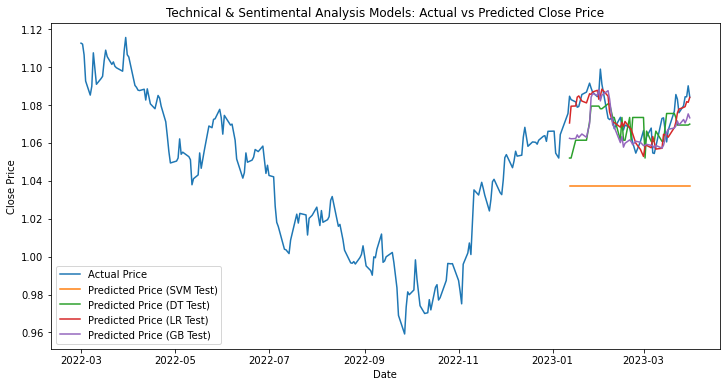

In [200]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_svm_tsa, label='Predicted Price (SVM Test)')
plt.plot(X_test.index, y_pred_dt_tsa, label='Predicted Price (DT Test)')
plt.plot(X_test.index, y_pred_lr_tsa, label='Predicted Price (LR Test)')
plt.plot(X_test.index, y_pred_gb_tsa, label='Predicted Price (GB Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Technical & Sentimental Analysis Models: Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [202]:
from tabulate import tabulate

# Create a dictionary to store the model names and their respective metrics
models = {'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
          'MSE': [mse_lr_tsa, mse_svm_tsa, mse_dt_tsa, mse_gb_tsa],
          'RMSE': [rmse_lr_tsa, rmse_svm_tsa, rmse_dt_tsa, rmse_gb_tsa],
          'MAE': [mae_lr_tsa, mae_svm_tsa, mae_dt_tsa, mae_gb_tsa]}

# Create a pandas DataFrame from the dictionary
metrics_tsa = pd.DataFrame(models)

# Update the index to start from 1
metrics_tsa.index = range(1, len(metrics_tsa)+1)

# Convert the DataFrame to tabulate format
table = tabulate(metrics_tsa, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Technical & Sentimental Analysis', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the table
print(table)

                    Technical & Sentimental Analysis                   
╒════╤════════════════════════╤═════════════╤════════════╤════════════╕
│    │ Model                  │         MSE │       RMSE │        MAE │
╞════╪════════════════════════╪═════════════╪════════════╪════════════╡
│ 1  │ Linear Regression      │ 4.46557e-05 │ 0.00668249 │ 0.00528426 │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 2  │ Support Vector Machine │ 0.00153359  │ 0.0391611  │ 0.037517   │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 3  │ Decision Tree          │ 0.000194121 │ 0.0139327  │ 0.011883   │
├────┼────────────────────────┼─────────────┼────────────┼────────────┤
│ 4  │ Gradient Boosting      │ 0.000134529 │ 0.0115987  │ 0.00942956 │
╘════╧════════════════════════╧═════════════╧════════════╧════════════╛


In [203]:
## Hybrid Model using Linear Regression and Decision Tree on the Technical and Sentimental Analysis

In [204]:
from sklearn.ensemble import StackingRegressor

In [205]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [206]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

In [207]:
# Initialize Stacking Regressor with Linear Regression and Decision Tree Regressor as base models
hybrid_model = StackingRegressor(
    estimators=[('lr', lr_model), ('dt', dt)],
    final_estimator=LinearRegression()
)

In [208]:
# Fit the hybrid model on training data
hybrid_model.fit(X_train, y_train)

# Predict on test data
y_pred_hybrid_lrdt = hybrid_model.predict(X_test)

In [209]:
# Calculate MSE, RMSE, and MAE for hybrid model
mse_hybrid_lrdt = mean_squared_error(y_test, y_pred_hybrid_lrdt)
rmse_hybrid_lrdt = np.sqrt(mse_hybrid_lrdt)
mae_hybrid_lrdt = mean_absolute_error(y_test, y_pred_hybrid_lrdt)

In [210]:
print("Mean Squared Error (MSE) - Hybrid Model:", mse_hybrid_lrdt)
print("Root Mean Squared Error (RMSE) - Hybrid Model:", rmse_hybrid_lrdt)
print("Mean Absolute Error (MAE) - Hybrid Model:", mae_hybrid_lrdt)

Mean Squared Error (MSE) - Hybrid Model: 3.9794513254137696e-05
Root Mean Squared Error (RMSE) - Hybrid Model: 0.006308289249403336
Mean Absolute Error (MAE) - Hybrid Model: 0.004987948296508594


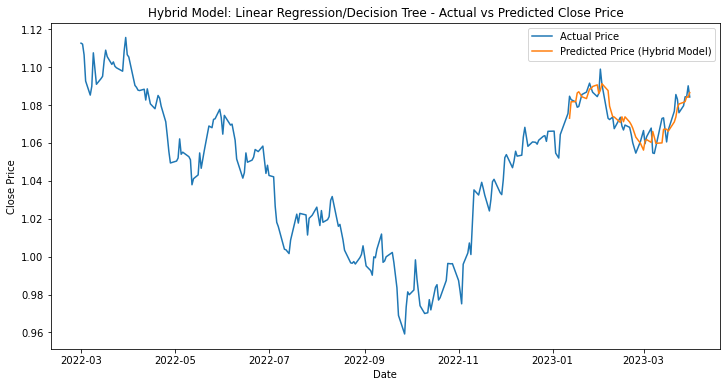

In [212]:
# Plot actual and predicted prices for hybrid model
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_hybrid_lrdt, label='Predicted Price (Hybrid Model)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Model: Linear Regression/Decision Tree - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [229]:
## Hybrid Model using Linear Regression and SVM on the Technical and Sentimental Analysis

In [230]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [231]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [232]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the Linear Regression model on training data
lr_model.fit(X_train, y_train)

# Predict on test data using Linear Regression
y_pred_lr_tsa = lr_model.predict(X_test)

# Initialize SVM model
svm_model = SVR(kernel='linear')

# Fit the SVM model on training data
svm_model.fit(X_train, y_train)

# Predict on test data using SVM
y_pred_svm_tsa = svm_model.predict(X_test)

In [233]:
# Create a new feature matrix by combining the predicted values from both models
X_hybrid = np.column_stack((y_pred_lr_tsa, y_pred_svm_tsa))

# Initialize Hybrid model (e.g., Linear Regression)
hybrid_model = LinearRegression()

# Fit the Hybrid model on training data
hybrid_model.fit(X_hybrid, y_test)

# Predict on test data using the Hybrid model
y_pred_hybrid_lrsvm = hybrid_model.predict(X_hybrid)

In [235]:
# Calculate MSE
mse_hybrid_lrsvm = mean_squared_error(y_test, y_pred_hybrid_lrsvm)

# Calculate RMSE
rmse_hybrid_lrsvm = np.sqrt(mse_hybrid_lrsvm)

# Calculate MAE
mae_hybrid_lrsvm = mean_absolute_error(y_test, y_pred_hybrid_lrsvm)

In [236]:
print("Mean Squared Error (MSE) of Hybrid Model:", mse_hybrid_lrsvm)
print("Root Mean Squared Error (RMSE) of Hybrid Model:", rmse_hybrid_lrsvm)
print("Mean Absolute Error (MAE) of Hybrid Model:", mae_hybrid_lrsvm)

Mean Squared Error (MSE) of Hybrid Model: 3.871262707742645e-05
Root Mean Squared Error (RMSE) of Hybrid Model: 0.006221947209469592
Mean Absolute Error (MAE) of Hybrid Model: 0.0050145906102115395


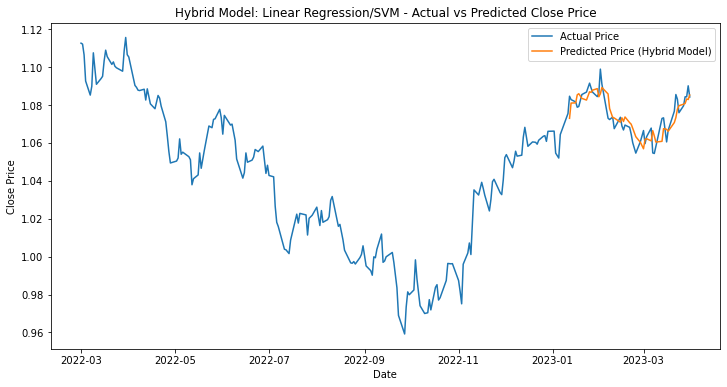

In [237]:
# Plot actual and predicted prices for hybrid model
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_hybrid_lrsvm, label='Predicted Price (Hybrid Model)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Model: Linear Regression/SVM - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [213]:
## Hybrid Model using Linear Regression and Gradient Boosting on the Technical and Sentimental Analysis

In [214]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [215]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

In [216]:
# Initialize Stacking Regressor with Linear Regression and Gradient Boosting as base models
hybrid_model = StackingRegressor(
    estimators=[('lr', lr_model), ('gb', gb_model)],
    final_estimator=LinearRegression()
)

In [217]:
# Fit the hybrid model on training data
hybrid_model.fit(X_train, y_train)

# Predict on test data
y_pred_hybrid_lrgb = hybrid_model.predict(X_test)

In [218]:
# Calculate MSE, RMSE, and MAE for hybrid model
mse_hybrid_lrgb = mean_squared_error(y_test, y_pred_hybrid_lrgb)
rmse_hybrid_lrgb = np.sqrt(mse_hybrid_lrgb)
mae_hybrid_lrgb = mean_absolute_error(y_test, y_pred_hybrid_lrgb)

In [219]:
print("Mean Squared Error (MSE) - Hybrid Model:", mse_hybrid_lrgb)
print("Root Mean Squared Error (RMSE) - Hybrid Model:", rmse_hybrid_lrgb)
print("Mean Absolute Error (MAE) - Hybrid Model:", mae_hybrid_lrgb)

Mean Squared Error (MSE) - Hybrid Model: 4.014743739622649e-05
Root Mean Squared Error (RMSE) - Hybrid Model: 0.00633620054892729
Mean Absolute Error (MAE) - Hybrid Model: 0.005050617629020848


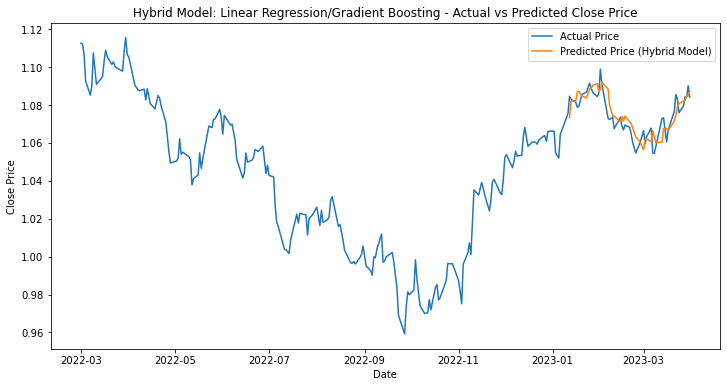

In [220]:
# Plot actual and predicted prices for hybrid model
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_hybrid_lrgb, label='Predicted Price (Hybrid Model)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Model: Linear Regression/Gradient Boosting - Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [221]:
## Hybrid Model using Decision Tree and Gradient Boosting on the Technical and Sentimental Analysis

In [222]:
EURUSD_TSA2 = EURUSD_TSA.copy()  # Create a copy of the original DataFrame

# Sort the data in descending order based on date
EURUSD_TSA2 = EURUSD_TSA2.sort_index(ascending=True)

EURUSD_TSA2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2022-03-01 to 2023-03-31
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         233 non-null    float64
 1   SMA                           233 non-null    float64
 2   EMA                           233 non-null    float64
 3   MACD                          233 non-null    float64
 4   MACD_Signal                   233 non-null    float64
 5   MACD_Hist                     233 non-null    float64
 6   Real Upper Band               233 non-null    float64
 7   Real Middle Band              233 non-null    float64
 8   Real Lower Band               233 non-null    float64
 9   ticker_sentiment_score2_mean  233 non-null    float64
dtypes: float64(10)
memory usage: 20.0 KB


In [223]:
# Drop any rows with missing values
EURUSD_TSA2.dropna(inplace=True)

# Split data into features (X) and target (y)
X = EURUSD_TSA2.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = EURUSD_TSA2['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

In [224]:
# Initialize Stacking Regressor with Decision Tree Regressor and Gradient Boosting Regressor as base models
hybrid_model = StackingRegressor(
    estimators=[('dt', dt), ('gb', gb_model)],
    final_estimator=DecisionTreeRegressor()
)

In [225]:
# Fit the hybrid model on training data
hybrid_model.fit(X_train, y_train)

# Predict on test data
y_pred_hybrid_dtgb = hybrid_model.predict(X_test)

In [226]:
# Calculate MSE, RMSE, and MAE for hybrid model
mse_hybrid_dtgb = mean_squared_error(y_test, y_pred_hybrid_dtgb)
rmse_hybrid_dtgb = np.sqrt(mse_hybrid_dtgb)
mae_hybrid_dtgb = mean_absolute_error(y_test, y_pred_hybrid_dtgb)

In [227]:
print("Mean Squared Error (MSE) - Hybrid Model:", mse_hybrid_dtgb)
print("Root Mean Squared Error (RMSE) - Hybrid Model:", rmse_hybrid_dtgb)
print("Mean Absolute Error (MAE) - Hybrid Model:", mae_hybrid_dtgb)

Mean Squared Error (MSE) - Hybrid Model: 0.0006750668085106394
Root Mean Squared Error (RMSE) - Hybrid Model: 0.025982047812107487
Mean Absolute Error (MAE) - Hybrid Model: 0.023174468085106405


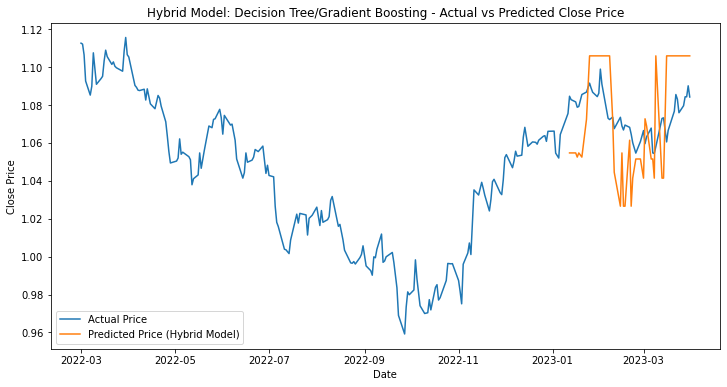

In [228]:
# Plot actual and predicted prices for hybrid model
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_hybrid_dtgb, label='Predicted Price (Hybrid Model)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Model: Decision Tree/Gradient Boosting - Actual vs Predicted Close Price')
plt.legend()
plt.show()

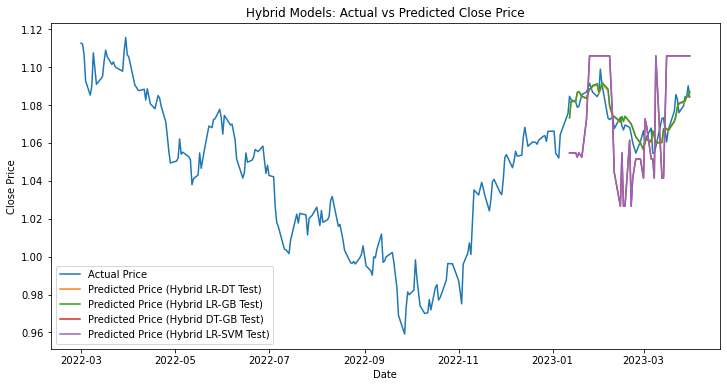

In [238]:
# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X.index, y, label='Actual Price')
plt.plot(X_test.index, y_pred_hybrid_lrdt, label='Predicted Price (Hybrid LR-DT Test)')
plt.plot(X_test.index, y_pred_hybrid_lrgb, label='Predicted Price (Hybrid LR-GB Test)')
plt.plot(X_test.index, y_pred_hybrid_dtgb, label='Predicted Price (Hybrid DT-GB Test)')
plt.plot(X_test.index, y_pred_hybrid_dtgb, label='Predicted Price (Hybrid LR-SVM Test)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Hybrid Models: Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [239]:

# Create a dictionary to store the model names and their respective metrics
models = {'Model': ['Hybrid Linear Regression/Decision Tree', 'Hybrid Linear Regression/Gradient Boosting', 'Hybrid Linear Regression/SVM','Hybrid Decision Tree/Gradient Boosting'],
          'MSE': [mse_hybrid_lrdt, mse_hybrid_lrgb, mse_hybrid_lrsvm, mse_hybrid_dtgb],
          'RMSE': [rmse_hybrid_lrdt, rmse_hybrid_lrgb, rmse_hybrid_lrsvm, rmse_hybrid_dtgb],
          'MAE': [mae_hybrid_lrdt, mae_hybrid_lrgb, mae_hybrid_lrsvm, mae_hybrid_dtgb]}

# Create a pandas DataFrame from the dictionary
metrics_hybrid = pd.DataFrame(models)

# Update the index to start from 1
metrics_hybrid.index = range(1, len(metrics_hybrid)+1)

# Convert the DataFrame to tabulate format
table = tabulate(metrics_hybrid, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Hybrid Models Analysis', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the table
print(table)

                                   Hybrid Models Analysis                                  
╒════╤════════════════════════════════════════════╤═════════════╤════════════╤════════════╕
│    │ Model                                      │         MSE │       RMSE │        MAE │
╞════╪════════════════════════════════════════════╪═════════════╪════════════╪════════════╡
│ 1  │ Hybrid Linear Regression/Decision Tree     │ 3.97945e-05 │ 0.00630829 │ 0.00498795 │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 2  │ Hybrid Linear Regression/Gradient Boosting │ 4.01474e-05 │ 0.0063362  │ 0.00505062 │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 3  │ Hybrid Linear Regression/SVM               │ 3.87126e-05 │ 0.00622195 │ 0.00501459 │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 4  │ Hybrid Decision Tree/Gradient Boosting     │ 0.000675067 │ 0.025982   │ 0

In [240]:
## Concatenate all tables into an 'All Metrics' Table
# Create dataframes for each table
metrics_ta = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                          'MSE': [mse_lr_ta, mse_svm_ta, mse_dt_ta, mse_gb_ta],
                          'RMSE': [rmse_lr_ta, rmse_svm_ta, rmse_dt_ta, rmse_gb_ta],
                          'MAE': [mae_lr_ta, mae_svm_ta, mae_dt_ta, mae_gb_ta]})

metrics_sa = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                          'MSE': [mse_lr_sa, mse_svm_sa, mse_dt_sa, mse_gb_sa],
                          'RMSE': [rmse_lr_sa, rmse_svm_sa, rmse_dt_sa, rmse_gb_sa],
                          'MAE': [mae_lr_sa, mae_svm_sa, mae_dt_sa, mae_gb_sa]})

metrics_tsa = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                           'MSE': [mse_lr_tsa, mse_svm_tsa, mse_dt_tsa, mse_gb_tsa],
                           'RMSE': [rmse_lr_tsa, rmse_svm_tsa, rmse_dt_tsa, rmse_gb_tsa],
                           'MAE': [mae_lr_tsa, mae_svm_tsa, mae_dt_tsa, mae_gb_tsa]})

metrics_hybrid = pd.DataFrame({'Model': ['Hybrid Linear Regression/Decision Tree', 'Hybrid Linear Regression/Gradient Boosting', 'Hybrid Linear Regression/SVM', 'Hybrid Decision Tree/Gradient Boosting'],
                               'MSE': [mse_hybrid_lrdt, mse_hybrid_lrgb, mse_hybrid_lrsvm, mse_hybrid_dtgb],
                               'RMSE': [rmse_hybrid_lrdt, rmse_hybrid_lrgb, rmse_hybrid_lrsvm, rmse_hybrid_dtgb],
                               'MAE': [mae_hybrid_lrdt, mae_hybrid_lrgb, mae_hybrid_lrsvm, mae_hybrid_dtgb]})

# Concatenate the dataframes vertically
all_metrics = pd.concat([metrics_ta, metrics_sa, metrics_tsa, metrics_hybrid], axis=0)

# Update the index to start from 1
all_metrics.index = range(1, len(all_metrics)+1)

# Convert the combined dataframe to tabulate format
table = tabulate(all_metrics, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Combined Analysis Results', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the combined table
print(table)

                                 Combined Analysis Results                                 
╒════╤════════════════════════════════════════════╤═════════════╤════════════╤════════════╕
│    │ Model                                      │         MSE │       RMSE │        MAE │
╞════╪════════════════════════════════════════════╪═════════════╪════════════╪════════════╡
│ 1  │ Linear Regression                          │ 4.33439e-05 │ 0.00658361 │ 0.00500295 │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 2  │ Support Vector Machine                     │ 0.00235892  │ 0.0485688  │ 0.0467191  │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 3  │ Decision Tree                              │ 0.000477913 │ 0.0218612  │ 0.0151081  │
├────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 4  │ Gradient Boosting                          │ 0.000365437 │ 0.0191164  │ 0

In [242]:
# Create dataframes for each table
metrics_ta = pd.DataFrame({'Analysis': ['Technical Analysis', 'Technical Analysis', 'Technical Analysis', 'Technical Analysis'],
                           'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                            'MSE': [mse_lr_ta, mse_svm_ta, mse_dt_ta, mse_gb_ta],
                            'RMSE': [rmse_lr_ta, rmse_svm_ta, rmse_dt_ta, rmse_gb_ta],
                            'MAE': [mae_lr_ta, mae_svm_ta, mae_dt_ta, mae_gb_ta]})

metrics_sa = pd.DataFrame({'Analysis': ['Sentimental Analysis', 'Sentimental Analysis', 'Sentimental Analysis', 'Sentimental Analysis'],
                           'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                            'MSE': [mse_lr_sa, mse_svm_sa, mse_dt_sa, mse_gb_sa],
                            'RMSE': [rmse_lr_sa, rmse_svm_sa, rmse_dt_sa, rmse_gb_sa],
                            'MAE': [mae_lr_sa, mae_svm_sa, mae_dt_sa, mae_gb_sa]})

metrics_tsa = pd.DataFrame({'Analysis': ['Technical & Sentimental Analysis', 'Technical & Sentimental Analysis', 'Technical & Sentimental Analysis', 'Technical & Sentimental Analysis'],
                            'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree', 'Gradient Boosting'],
                            'MSE': [mse_lr_tsa, mse_svm_tsa, mse_dt_tsa, mse_gb_tsa],
                            'RMSE': [rmse_lr_tsa, rmse_svm_tsa, rmse_dt_tsa, rmse_gb_tsa],
                            'MAE': [mae_lr_tsa, mae_svm_tsa, mae_dt_tsa, mae_gb_tsa]})

metrics_hybrid = pd.DataFrame({'Analysis': ['Hybrid Model Analysis', 'Hybrid Model Analysis', 'Hybrid Model Analysis', 'Hybrid Model Analysis'],
                               'Model': ['Hybrid Linear Regression/Decision Tree', 'Hybrid Linear Regression/Gradient Boosting', 'Hybrid Linear Regression/SVM', 'Hybrid Decision Tree/Gradient Boosting'],
                            'MSE': [mse_hybrid_lrdt, mse_hybrid_lrgb, mse_hybrid_lrsvm, mse_hybrid_dtgb],
                            'RMSE': [rmse_hybrid_lrdt, rmse_hybrid_lrgb, rmse_hybrid_lrsvm, rmse_hybrid_dtgb],
                            'MAE': [mae_hybrid_lrdt, mae_hybrid_lrgb, mae_hybrid_lrsvm, mae_hybrid_dtgb]})


# Create a list of dataframes
all_metrics = [metrics_ta, metrics_sa, metrics_tsa, metrics_hybrid]

# Create an empty dataframe to store the combined metrics
combined_metrics = pd.DataFrame()

# Concatenate all dataframes vertically
for metrics in all_metrics:
    combined_metrics = pd.concat([combined_metrics, metrics], axis=0, ignore_index=True)

# Update the index to start from 1
combined_metrics.index = range(1, len(combined_metrics)+1)

# Convert the combined DataFrame to tabulate format
table = tabulate(combined_metrics, headers='keys', tablefmt='fancy_grid', numalign=1)

# Format the header text with termcolor
header_text = colored('Combined Analysis Results', attrs=['bold'])

# Add a top line to the table with formatted header text
table = table.split('\n')
table.insert(0, header_text.center(len(table[0])))
table = '\n'.join(table)

# Print the combined table
print(table)

                                                  Combined Analysis Results                                                   
╒════╤══════════════════════════════════╤════════════════════════════════════════════╤═════════════╤════════════╤════════════╕
│    │ Analysis                         │ Model                                      │         MSE │       RMSE │        MAE │
╞════╪══════════════════════════════════╪════════════════════════════════════════════╪═════════════╪════════════╪════════════╡
│ 1  │ Technical Analysis               │ Linear Regression                          │ 4.33439e-05 │ 0.00658361 │ 0.00500295 │
├────┼──────────────────────────────────┼────────────────────────────────────────────┼─────────────┼────────────┼────────────┤
│ 2  │ Technical Analysis               │ Support Vector Machine                     │ 0.00235892  │ 0.0485688  │ 0.0467191  │
├────┼──────────────────────────────────┼────────────────────────────────────────────┼─────────────┼───────────

In [248]:
# Convert the combined DataFrame to tabulate format
table = tabulate(combined_metrics, headers='keys', tablefmt='fancy_grid', numalign=1)

# Save the table as a CSV file with UTF-8 encoding
with open('combined_metrics.csv', 'w', encoding='utf-8') as file:
    file.write(table)